In [8]:
%reload_ext autoreload
%autoreload 2

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from attrition_prediction.data_processing.processing_io import ReadAttritionDataFromCSV
from attrition_prediction.visualization.data_visualization import AttritionPlotting
%matplotlib inline

plt.style.use('ggplot')

In [10]:
def display_n_rows_from_df(data_pd_df, num_rows):
    with pd.option_context('display.min_rows', num_rows, 'display.max_rows', num_rows, 'display.max_columns', None):
        display(data_pd_df.head(num_rows))
    print(f'Displayed rows: {num_rows}/{len(data_pd_df)}. Columns: {len(data_pd_df.columns)}')

In [11]:
data_str_path = '/Users/aponcedeleonch/Documents/WorkApplications/Crayon/employee-attrition.csv'
data_pd_df = ReadAttritionDataFromCSV(data_str_path).process()
display_n_rows_from_df(data_pd_df, 10)

Going to remove column: Over18. Contains single value
Going to remove column: StandardHours. Contains single value


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7


Displayed rows: 10/1470. Columns: 31


In [12]:
number_of_yes_and_no = data_pd_df[['Attrition']].groupby('Attrition').size()
display(number_of_yes_and_no)

Attrition
No     1233
Yes     237
dtype: int64

In [13]:
columns_corr = ['HourlyRate', 'DailyRate', 'MonthlyRate']
columns_npy = data_pd_df[columns_corr].to_numpy()
np.corrcoef(columns_npy, rowvar=False)

array([[ 1.        ,  0.02338142, -0.01529675],
       [ 0.02338142,  1.        , -0.0321816 ],
       [-0.01529675, -0.0321816 ,  1.        ]])

/Users/aponcedeleonch/Documents/WorkApplications/Crayon/attrition_prediction/attrition_prediction/visualization/data_visualization.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(14, 8), layout='constrained')


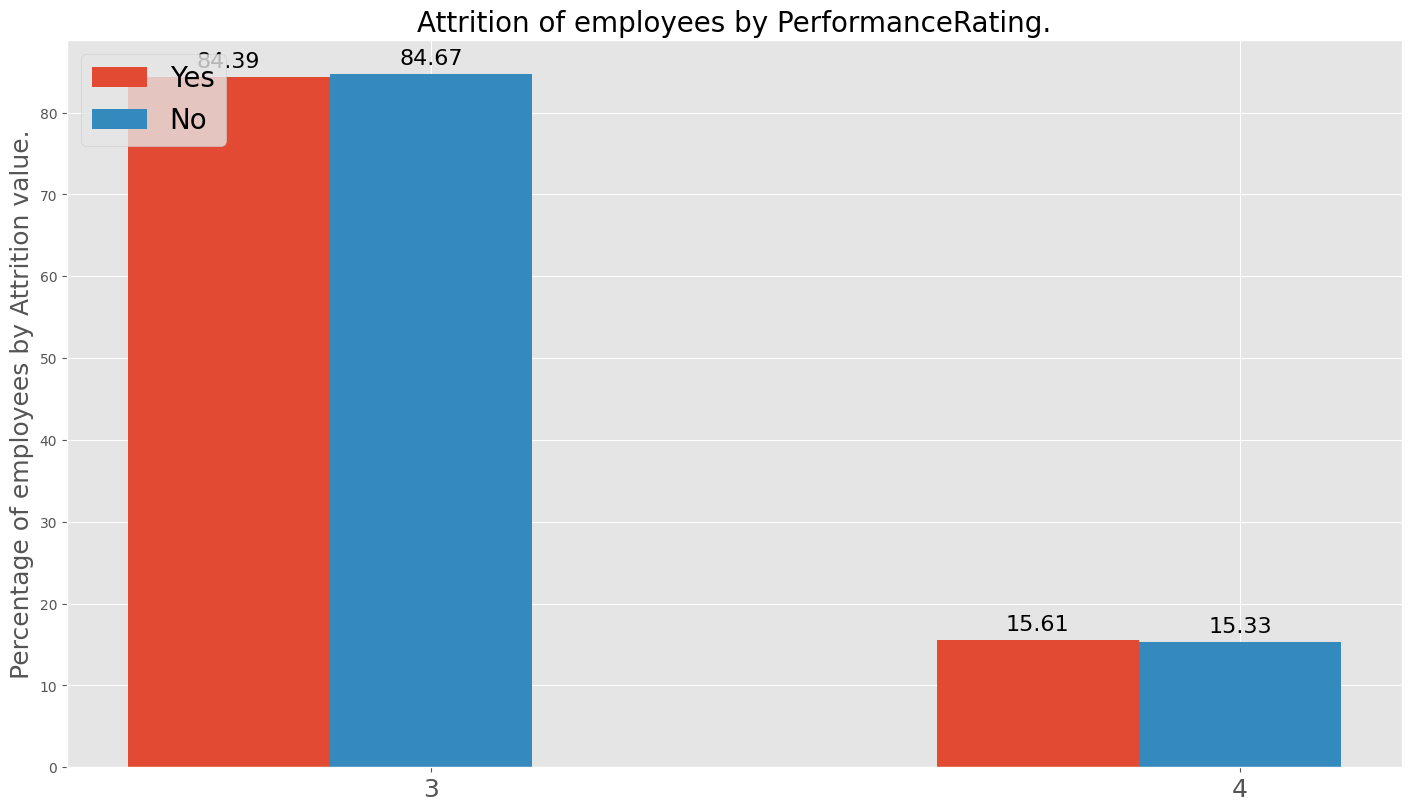

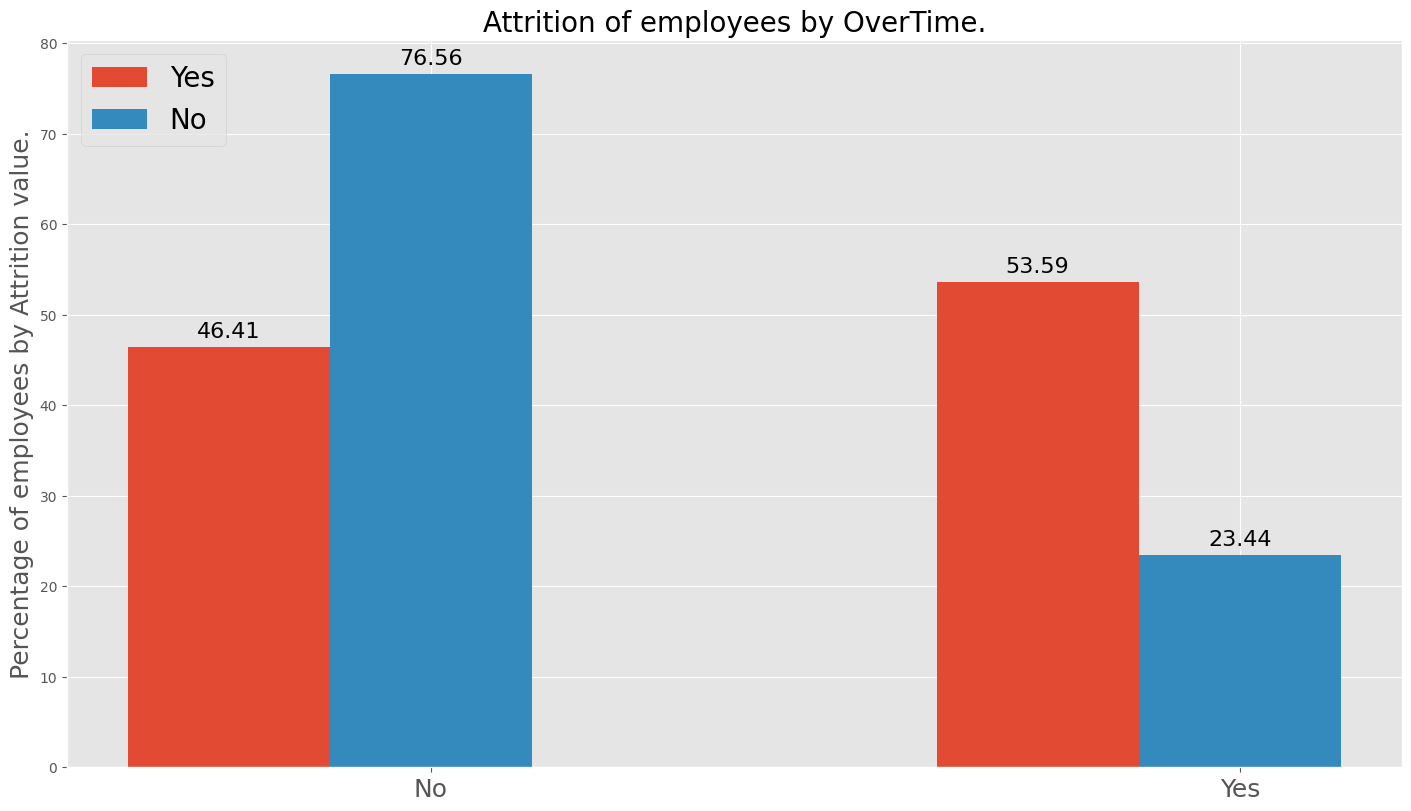

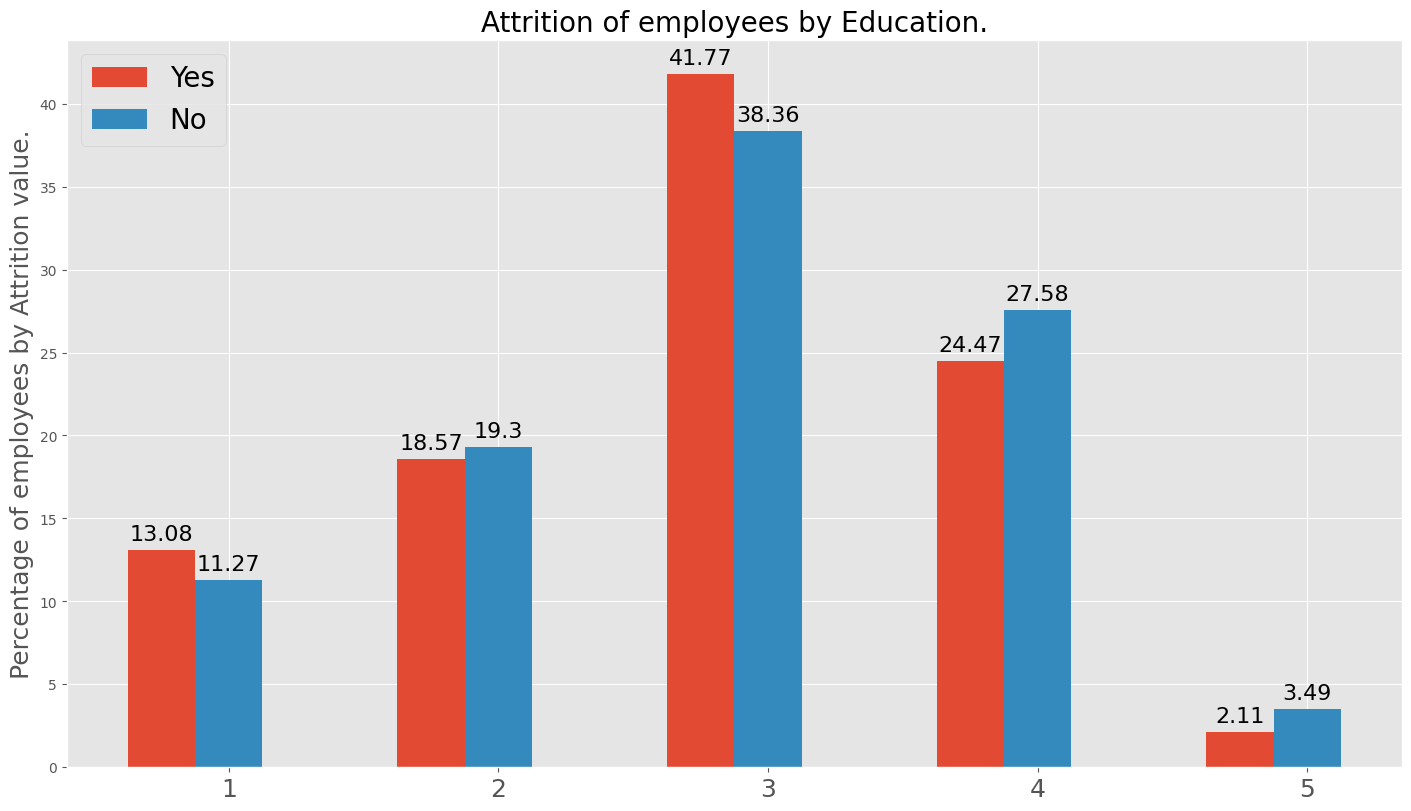

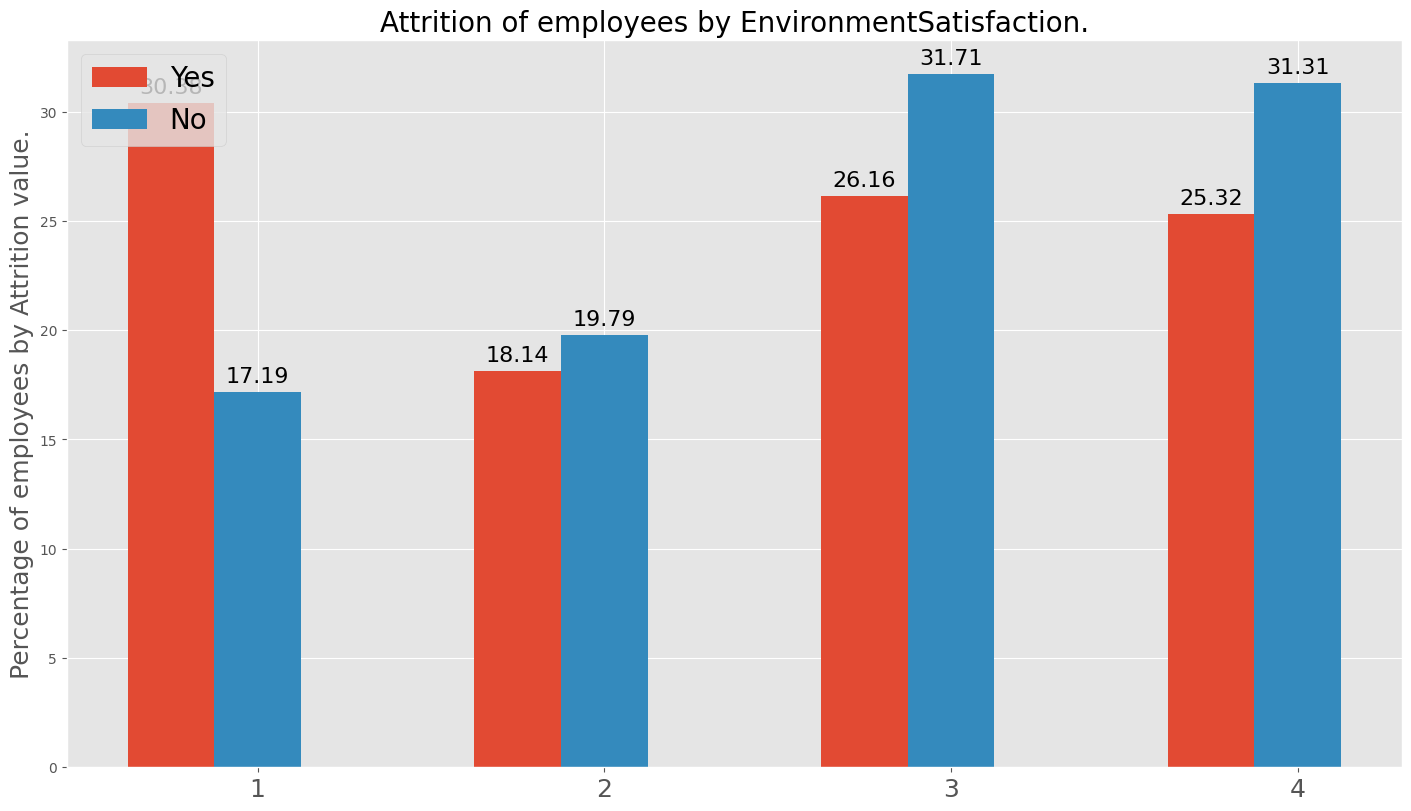

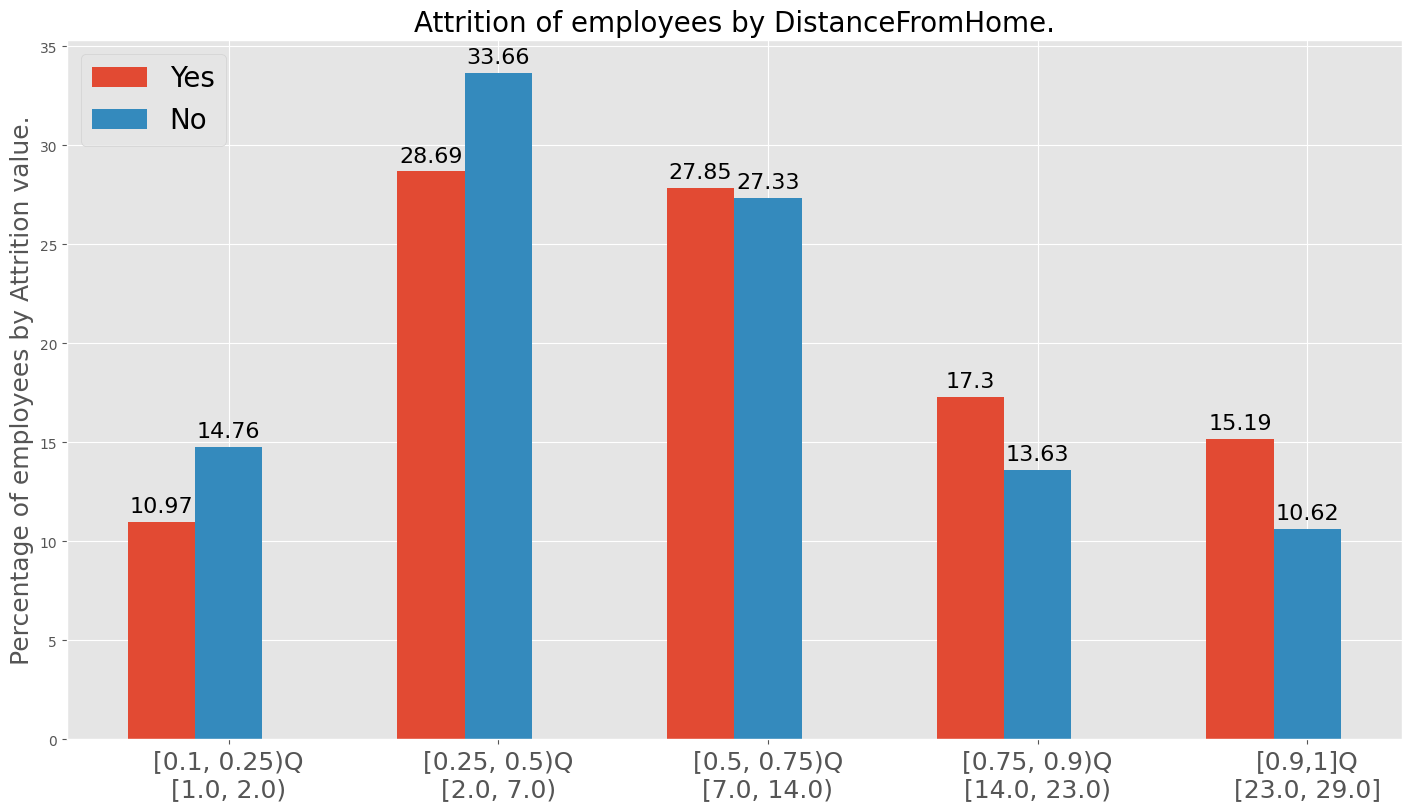

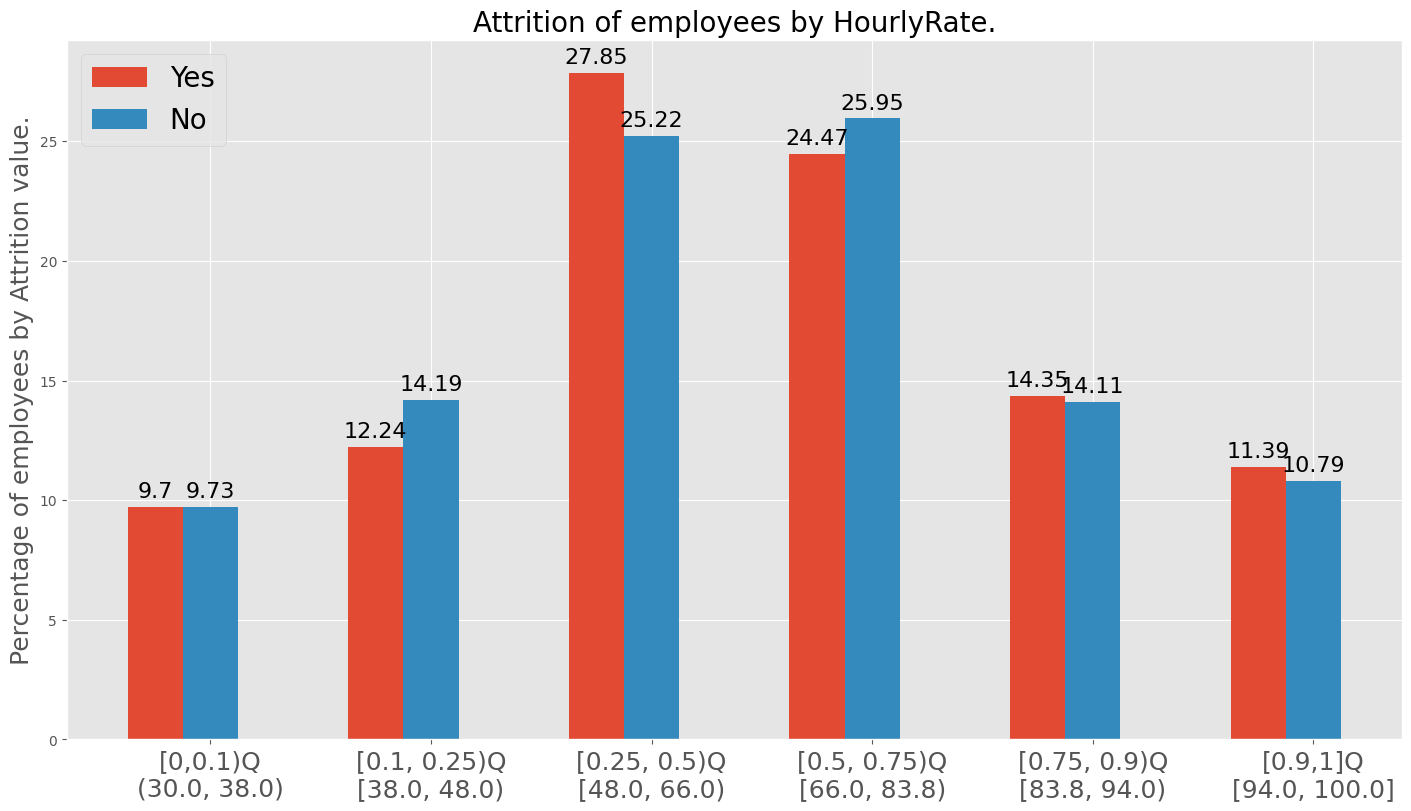

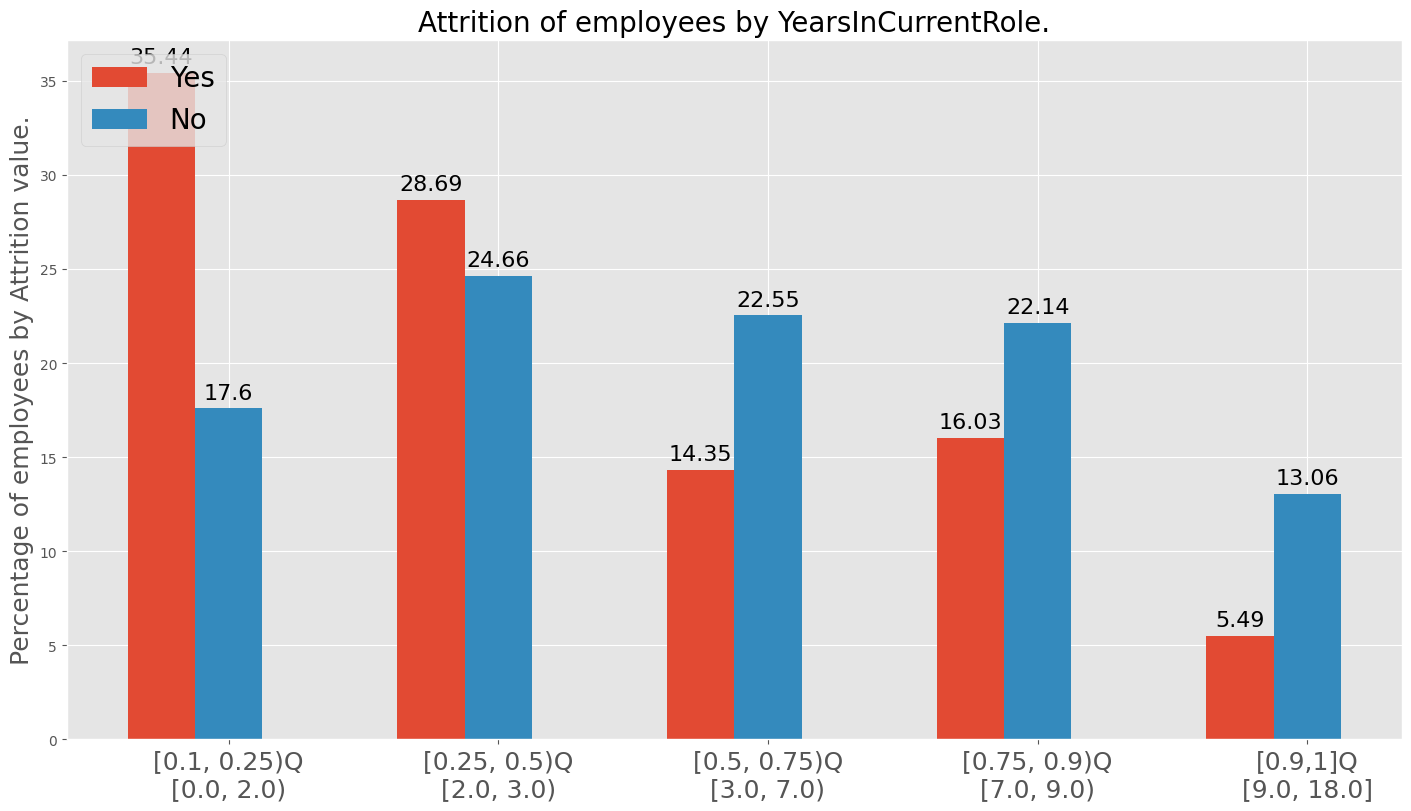

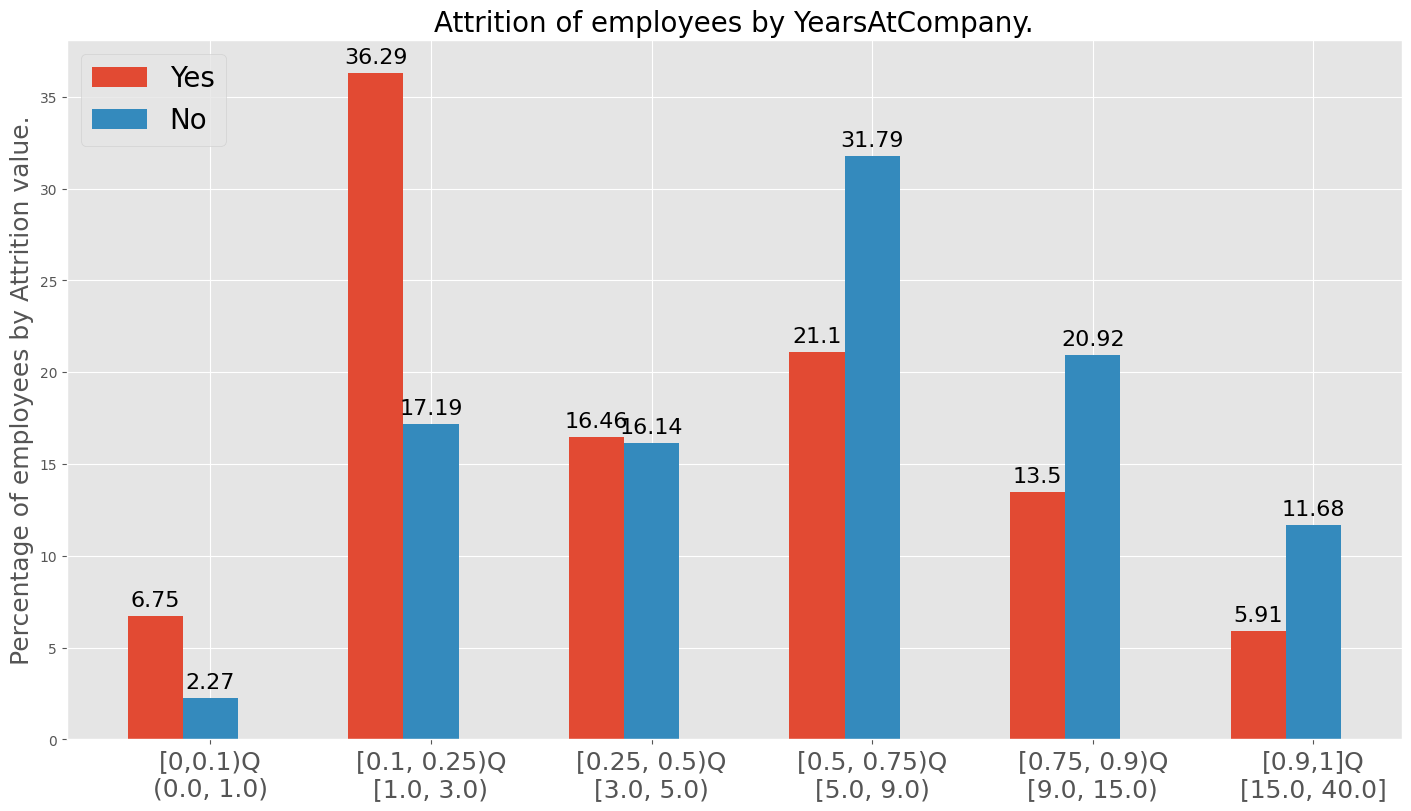

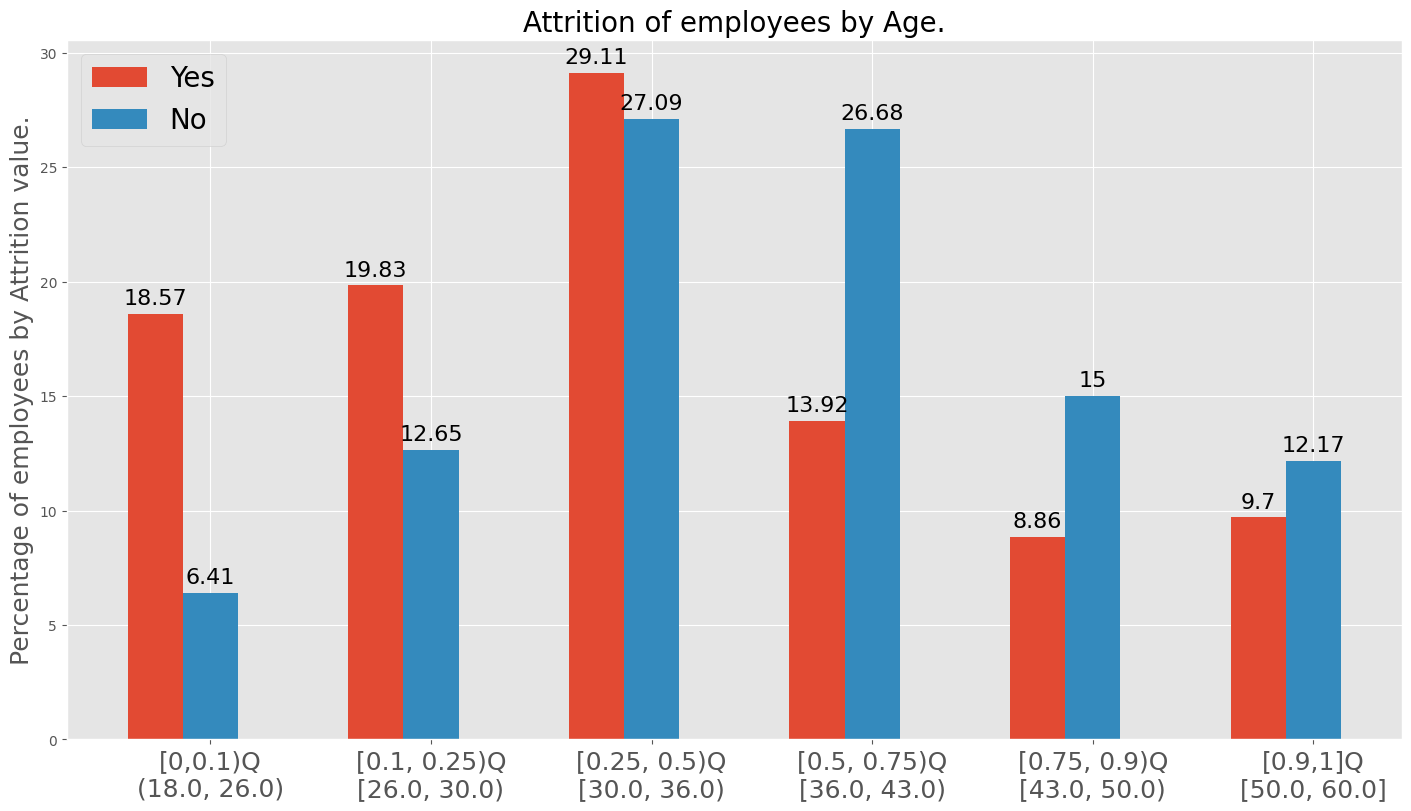

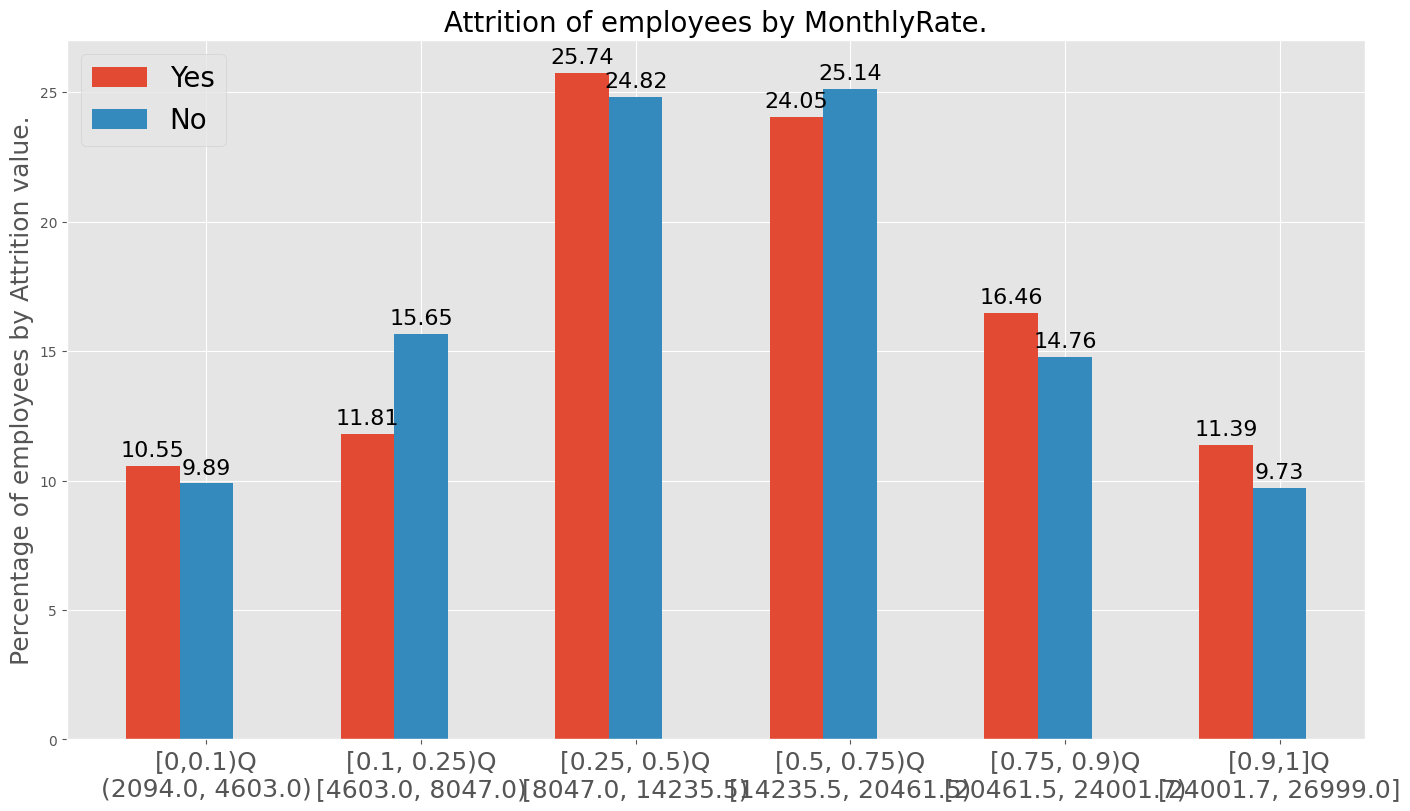

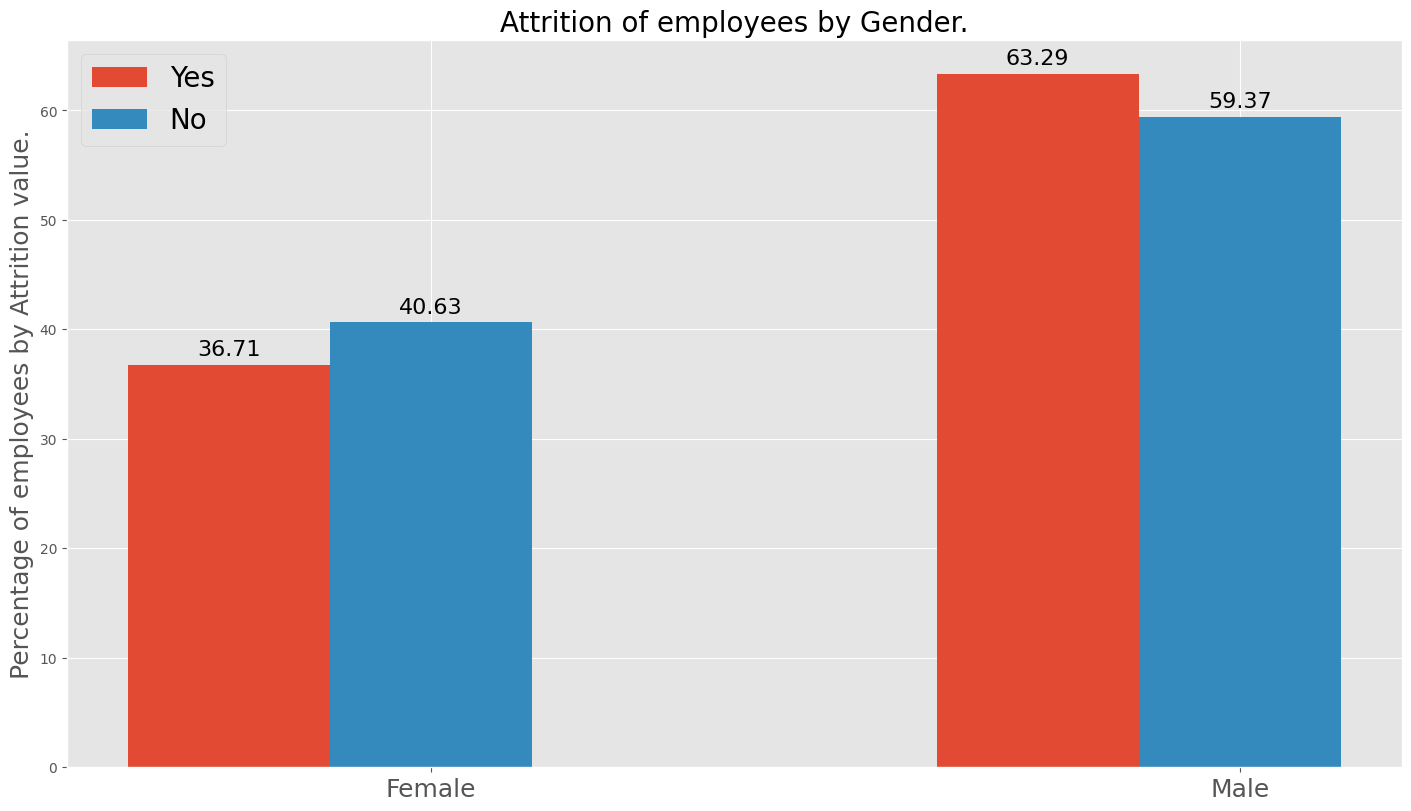

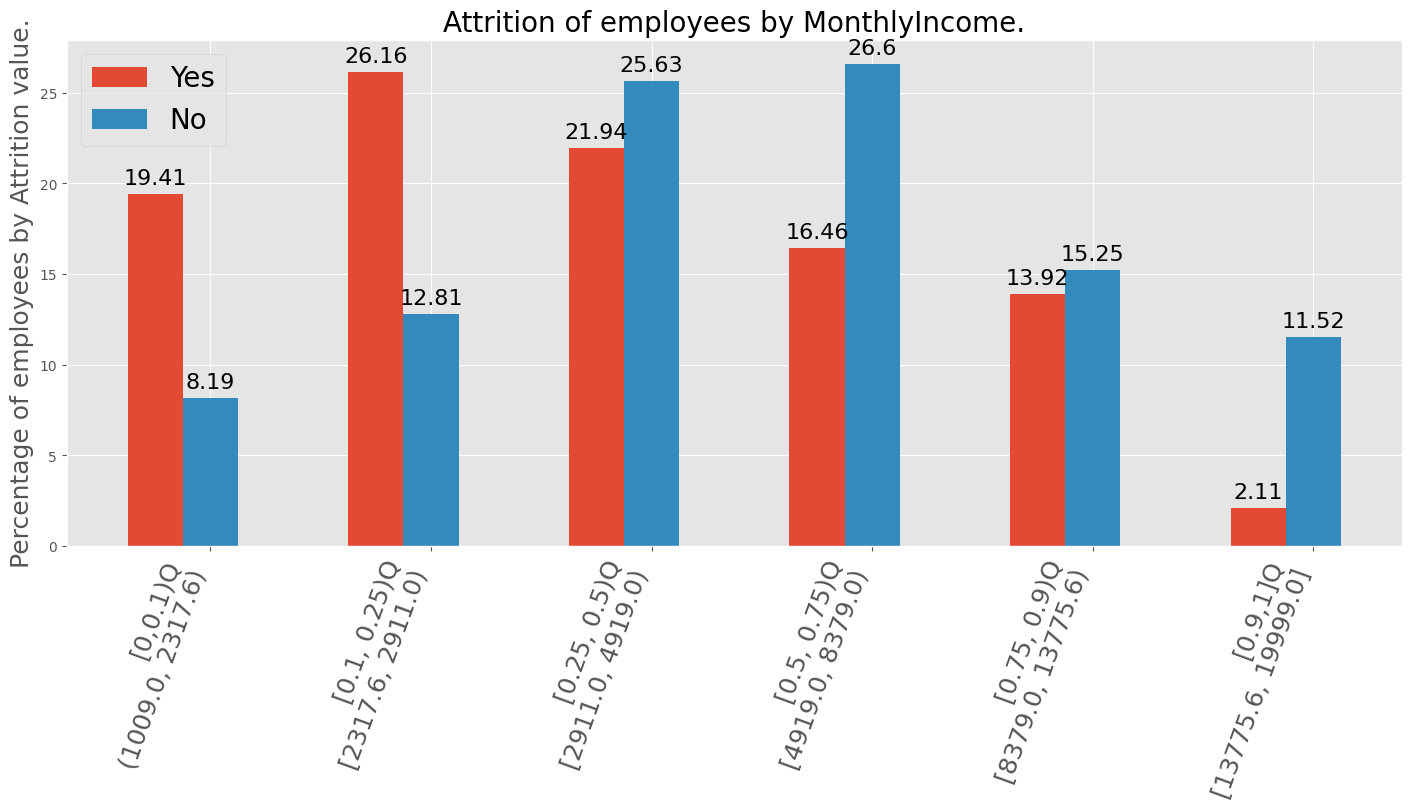

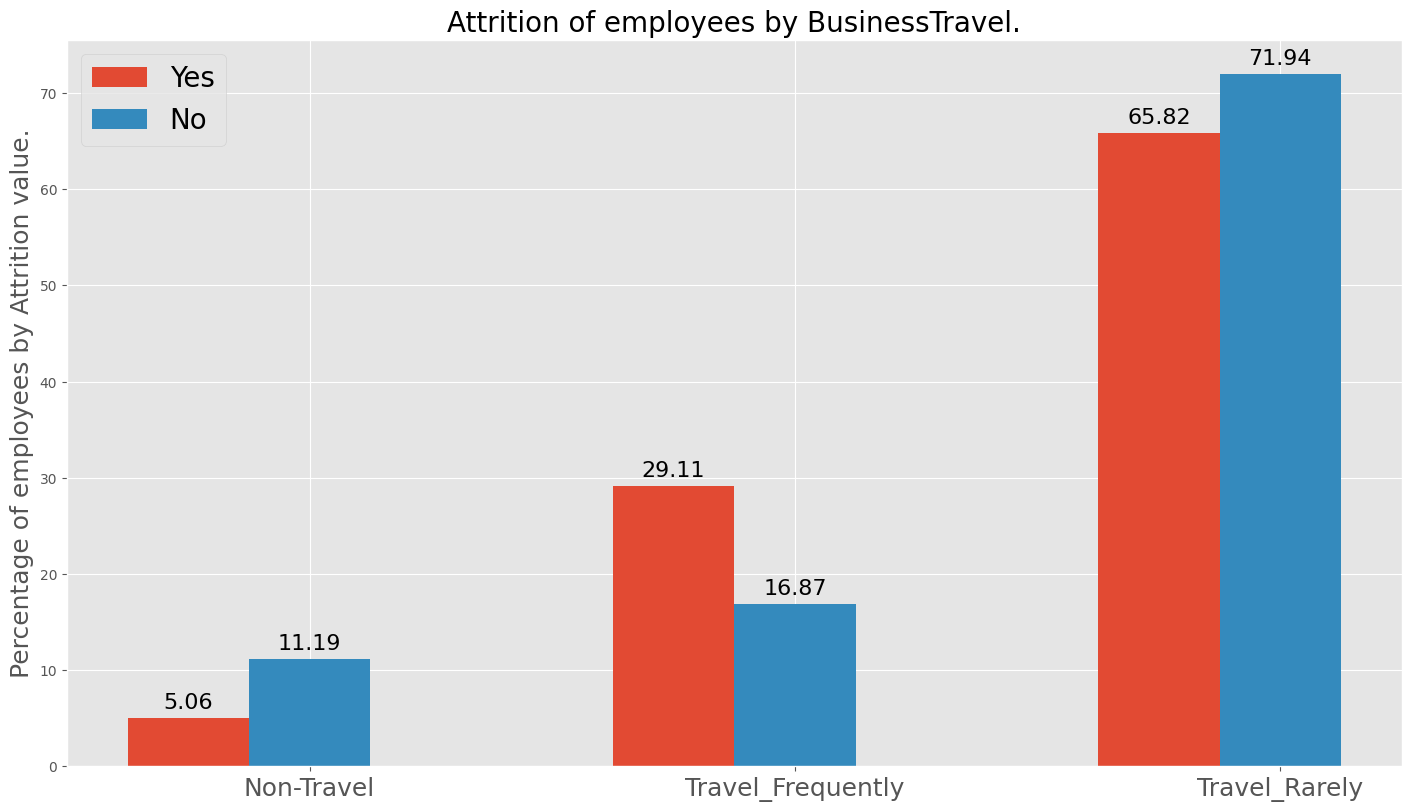

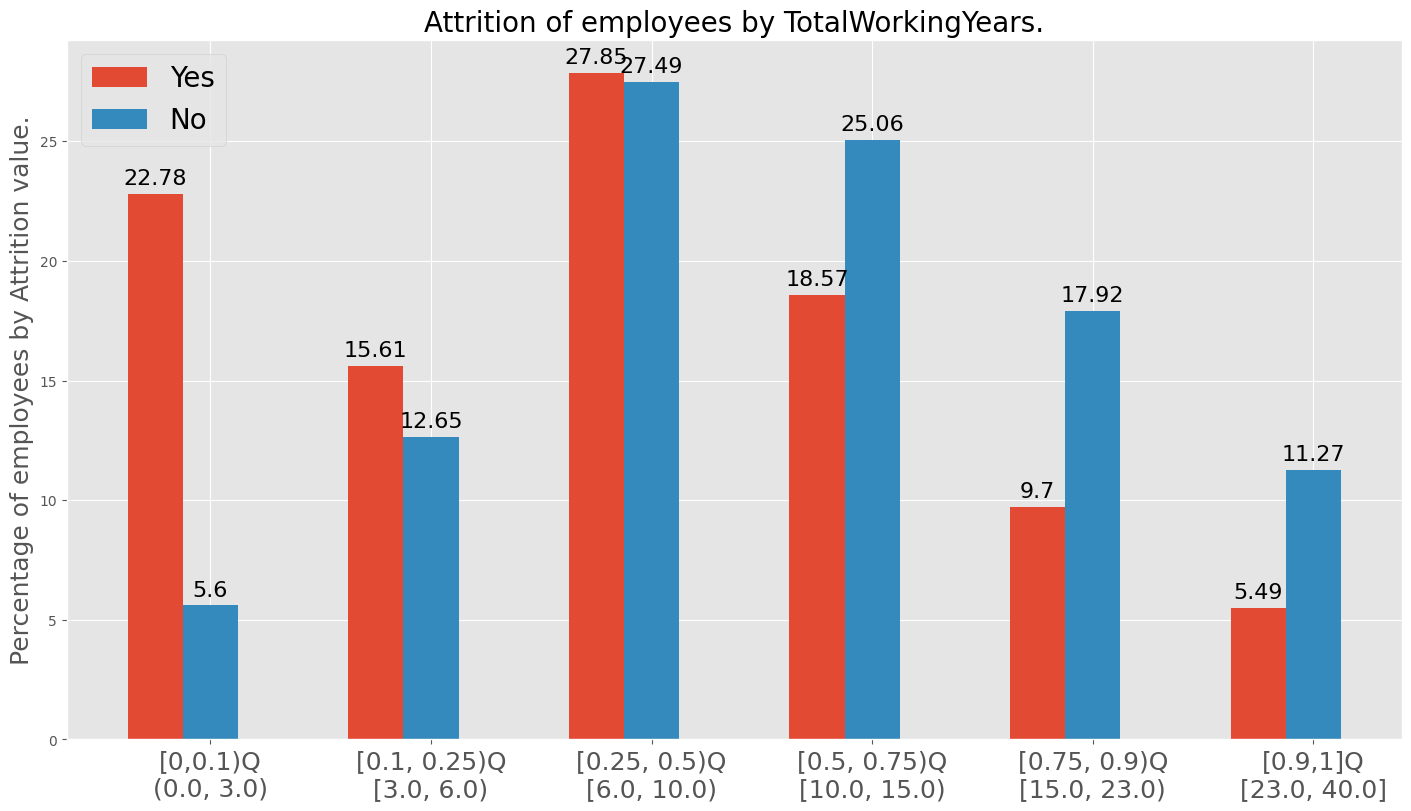

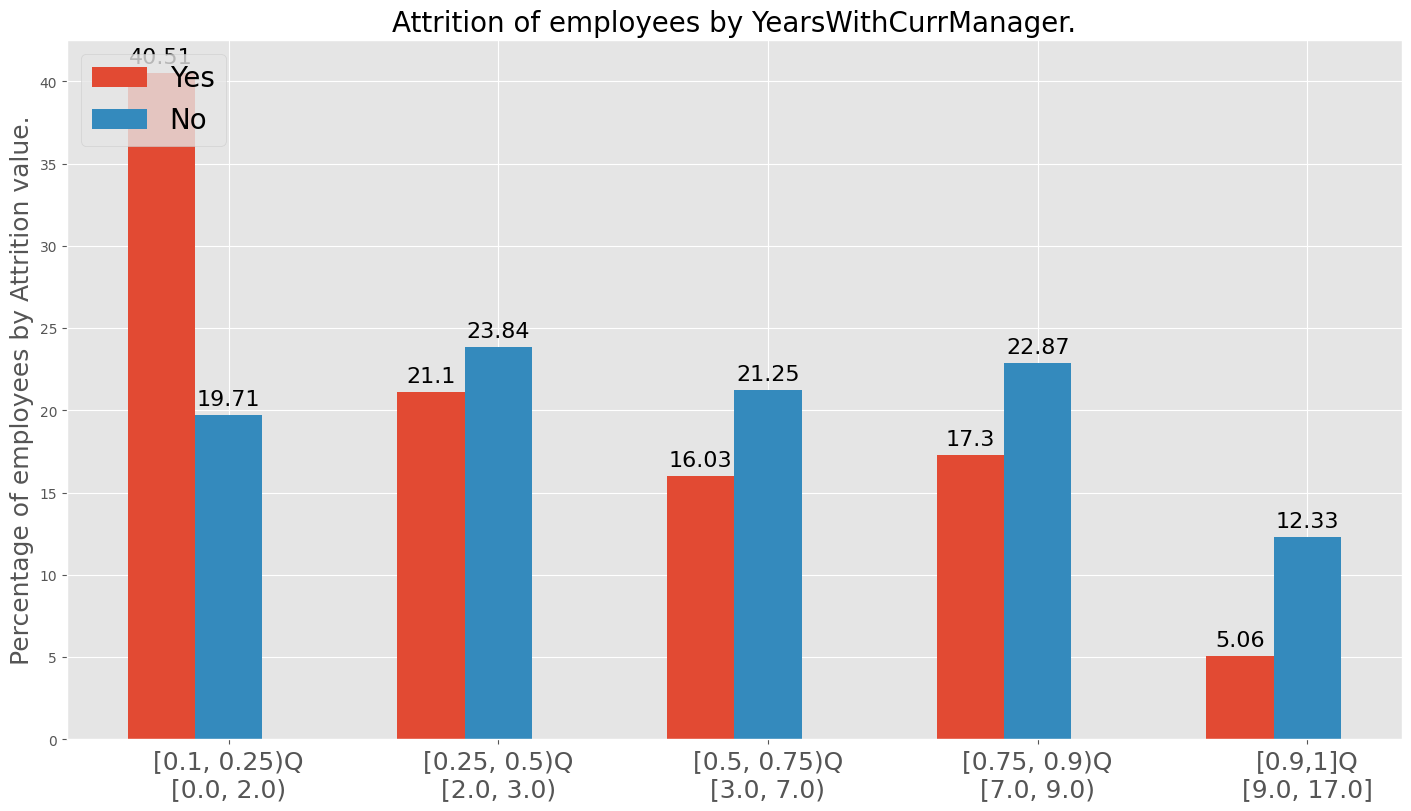

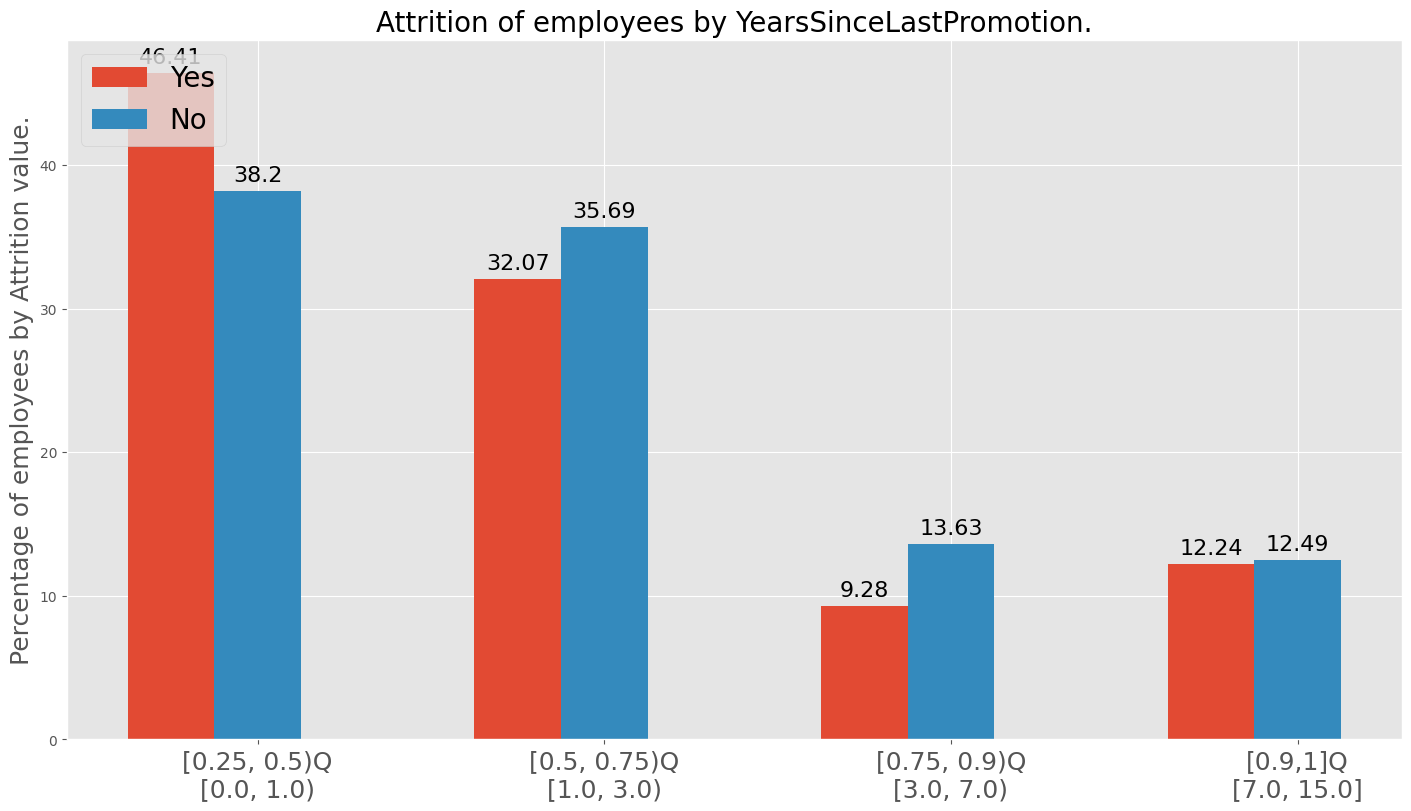

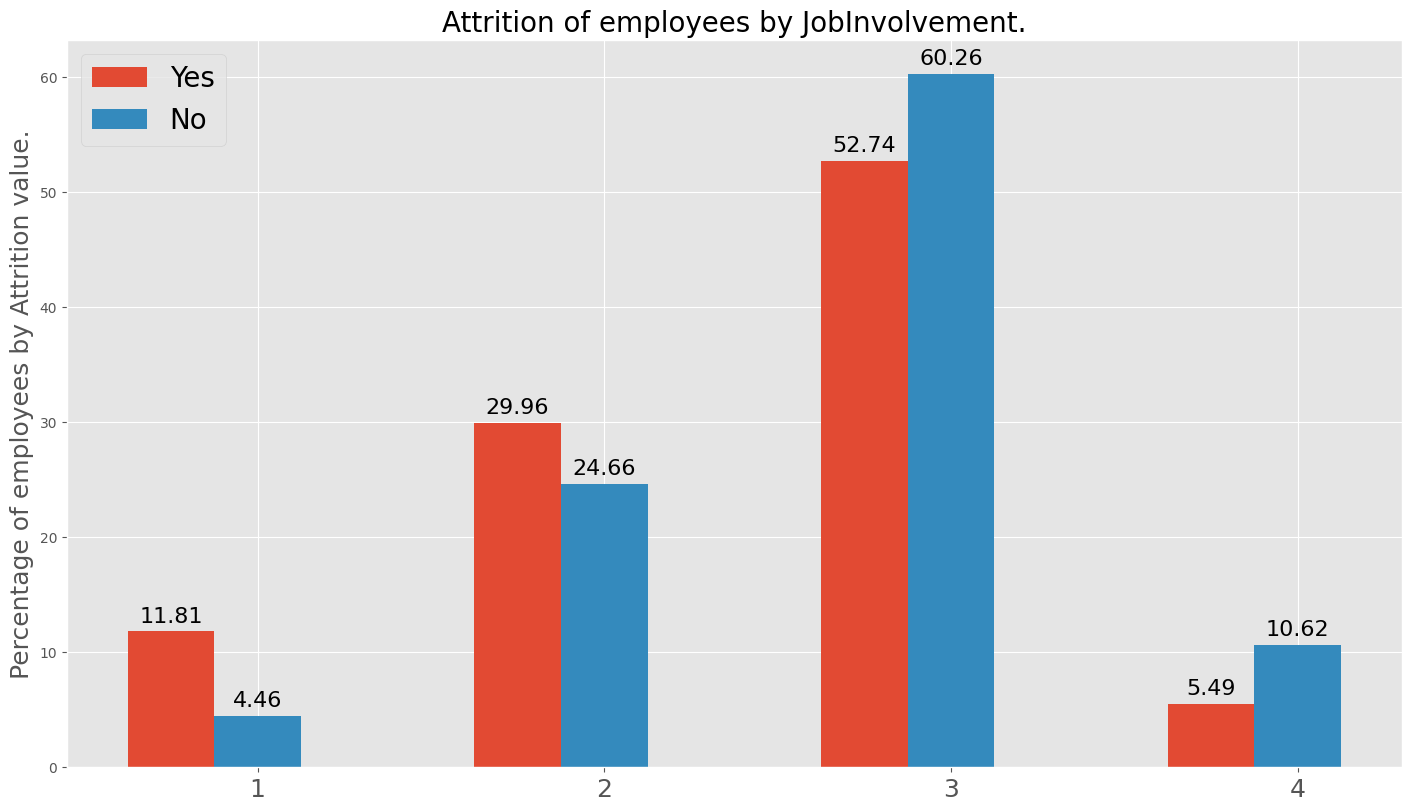

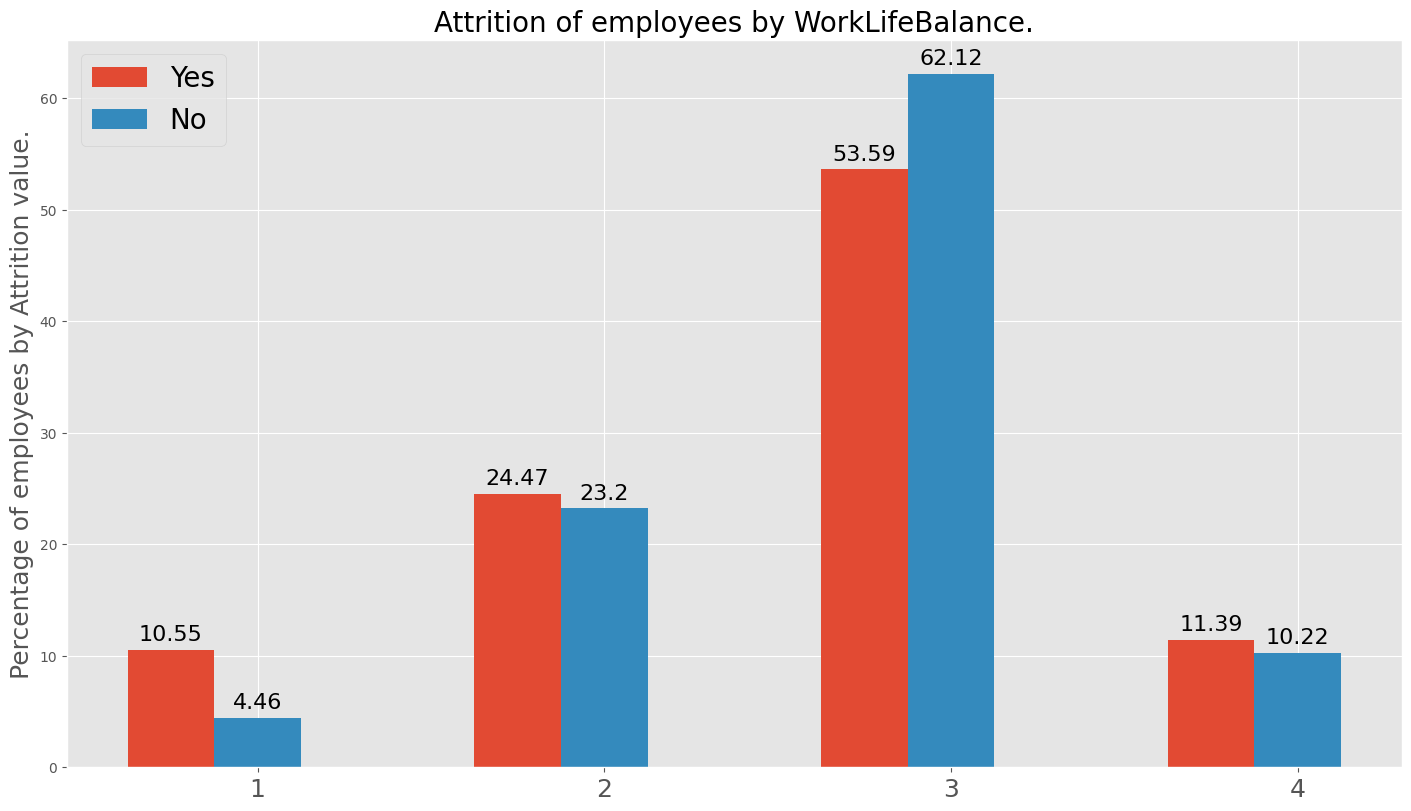

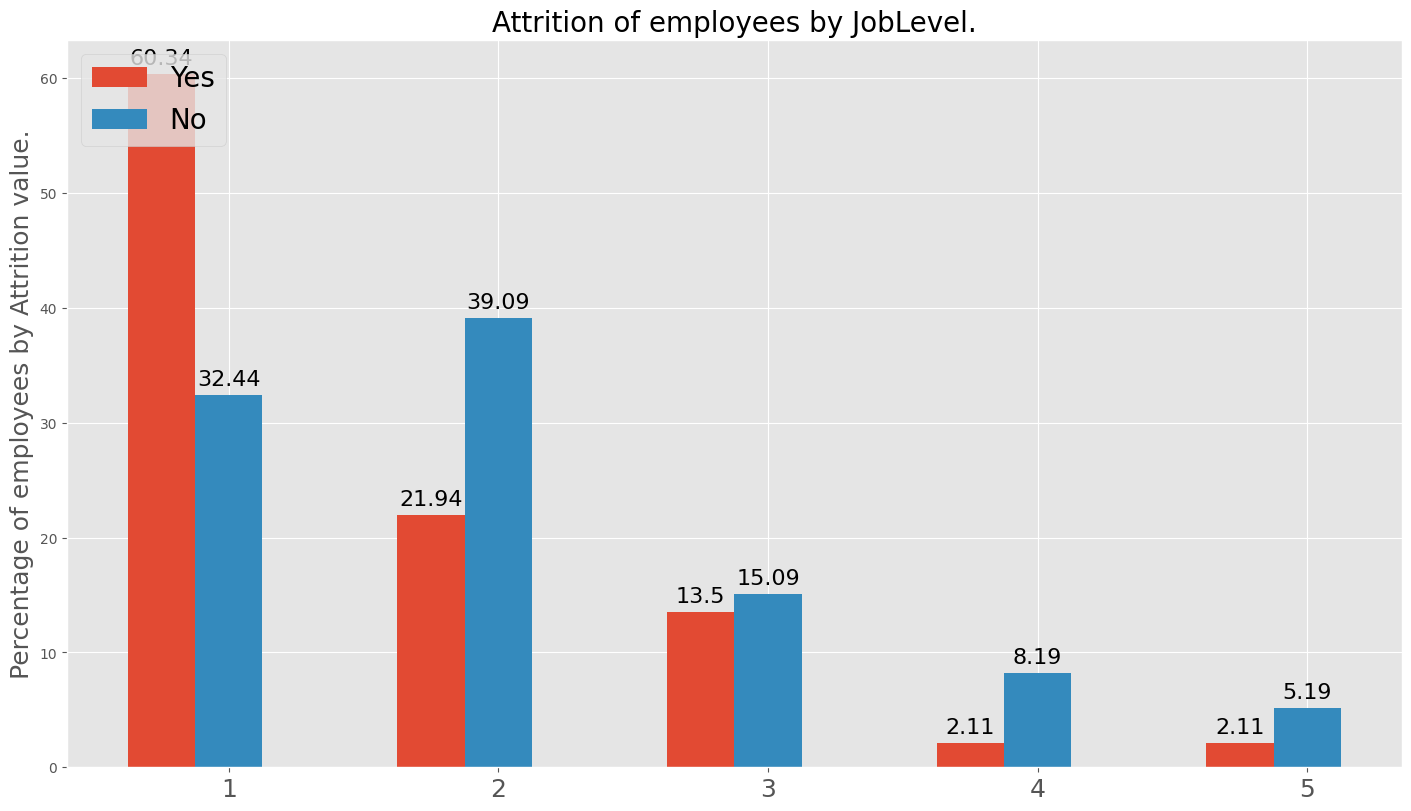

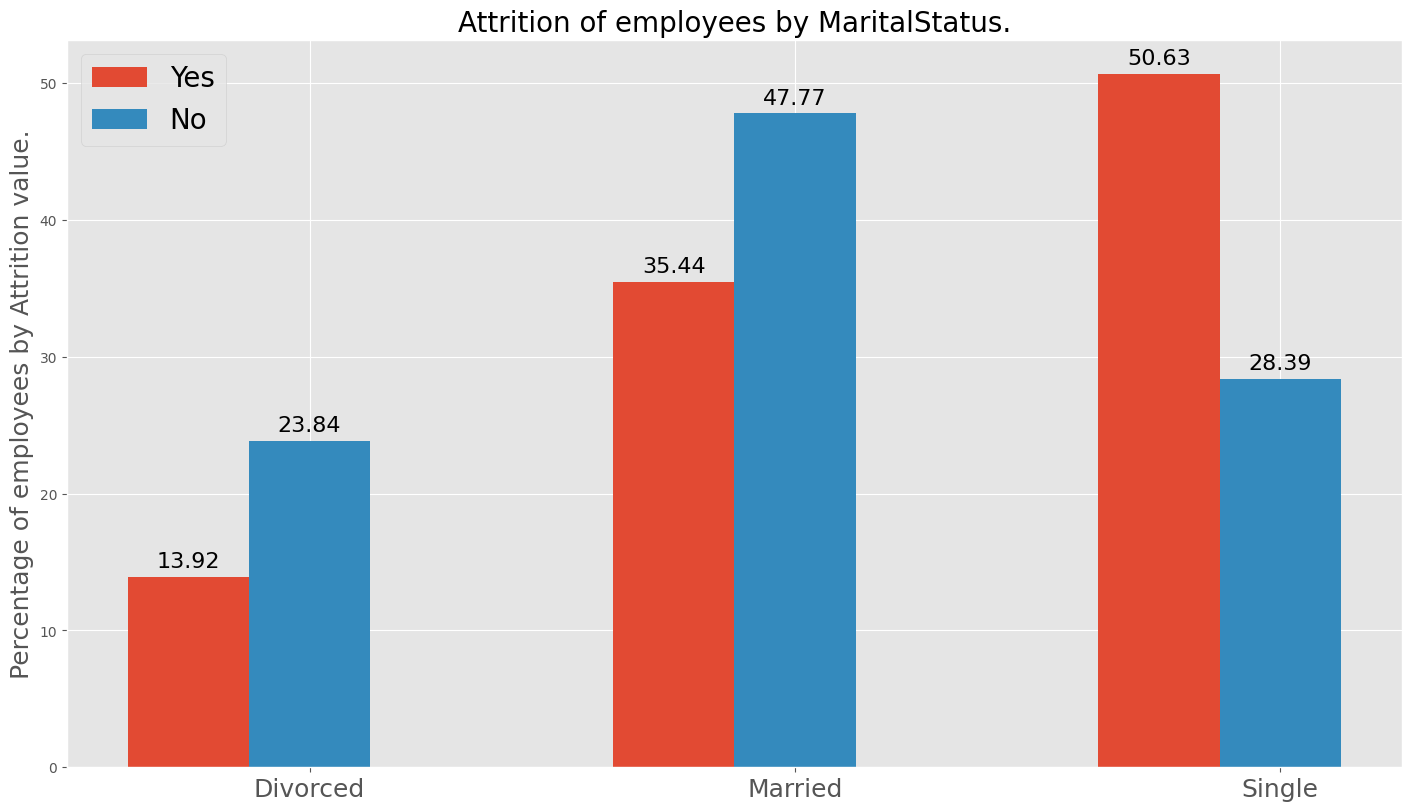

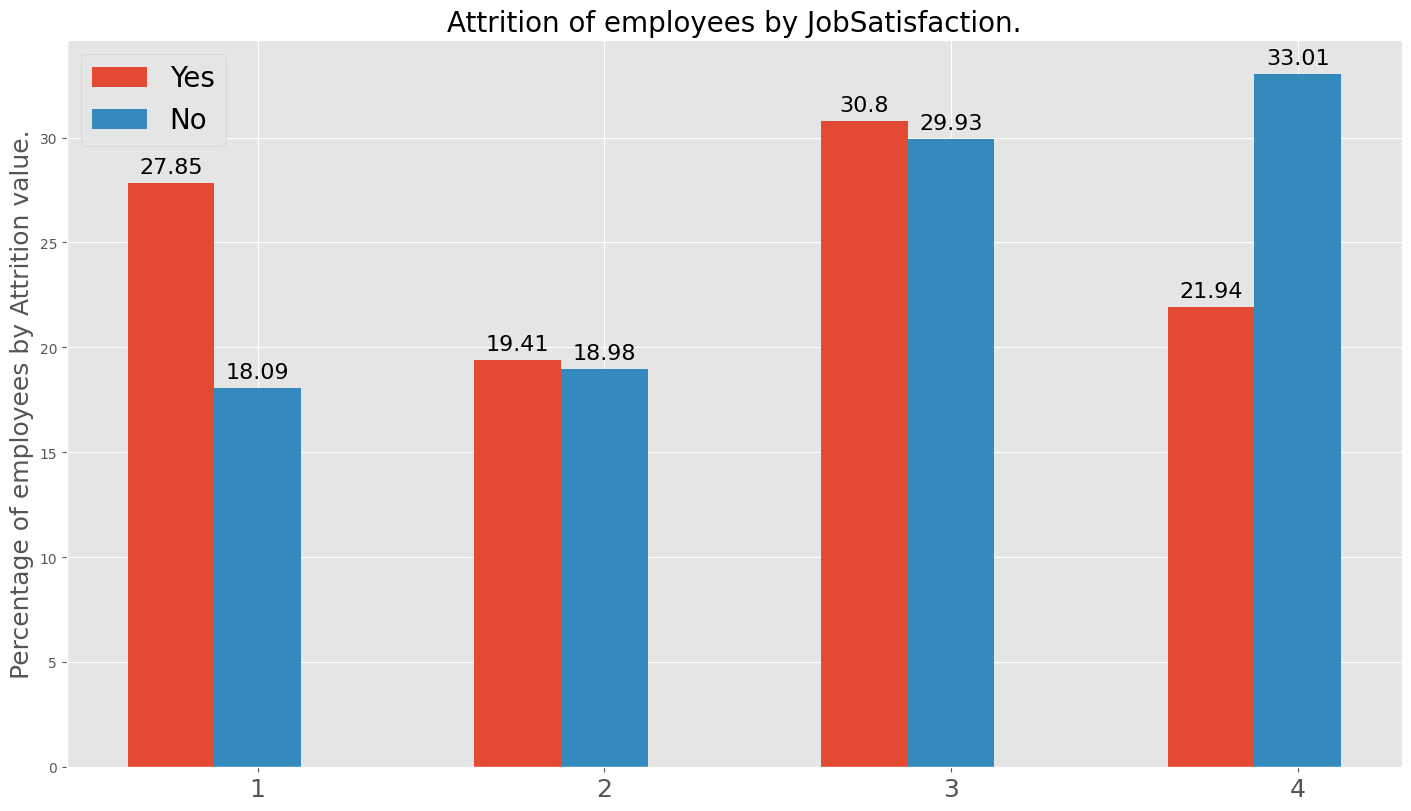

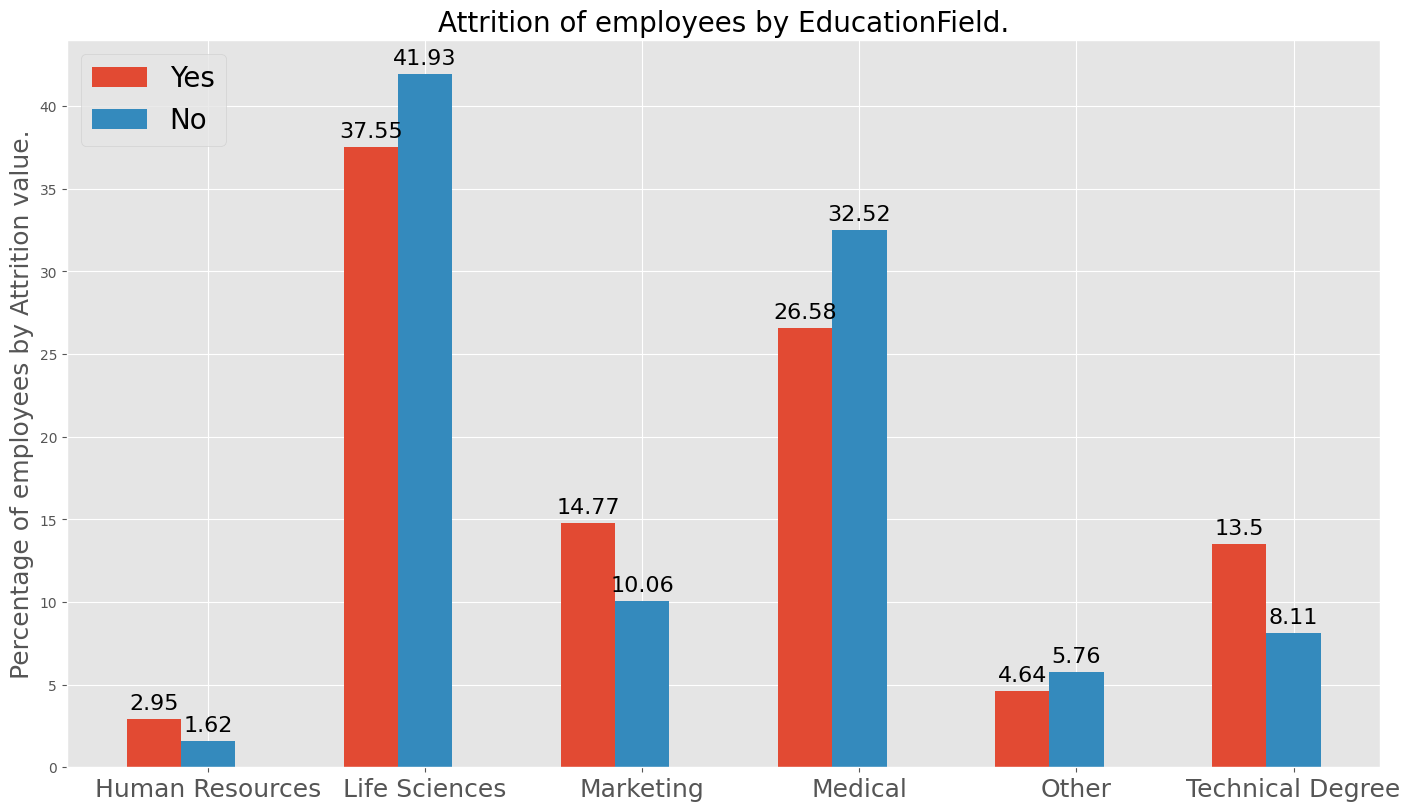

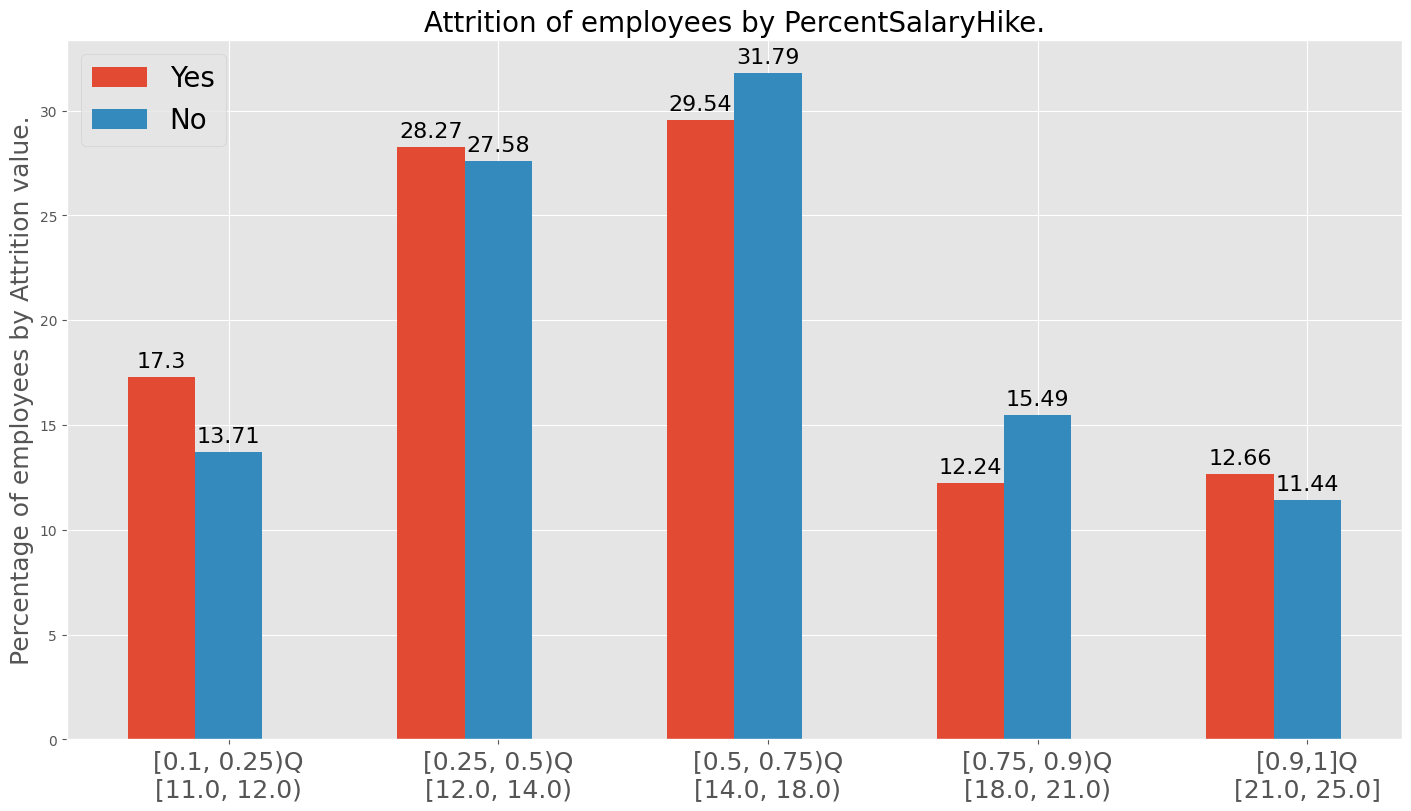

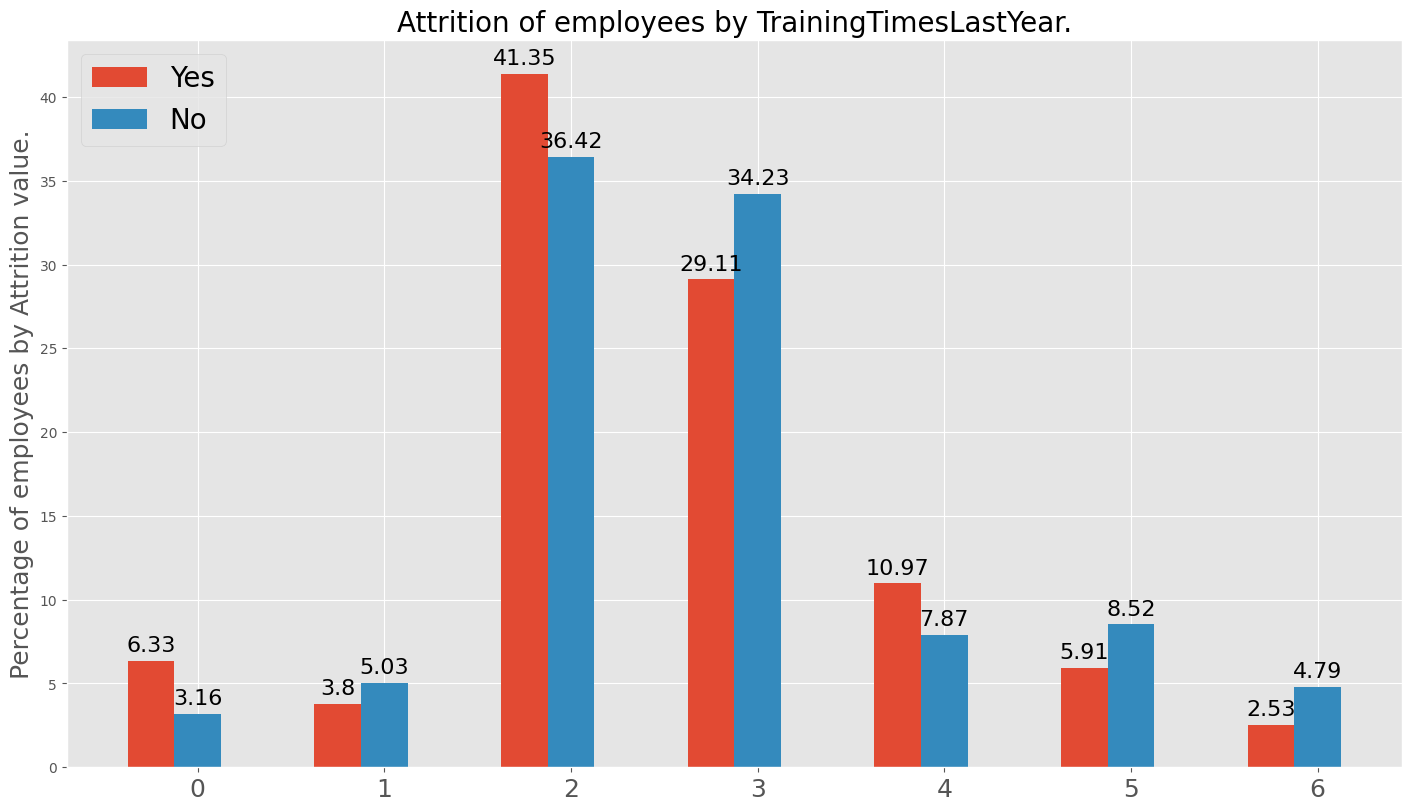

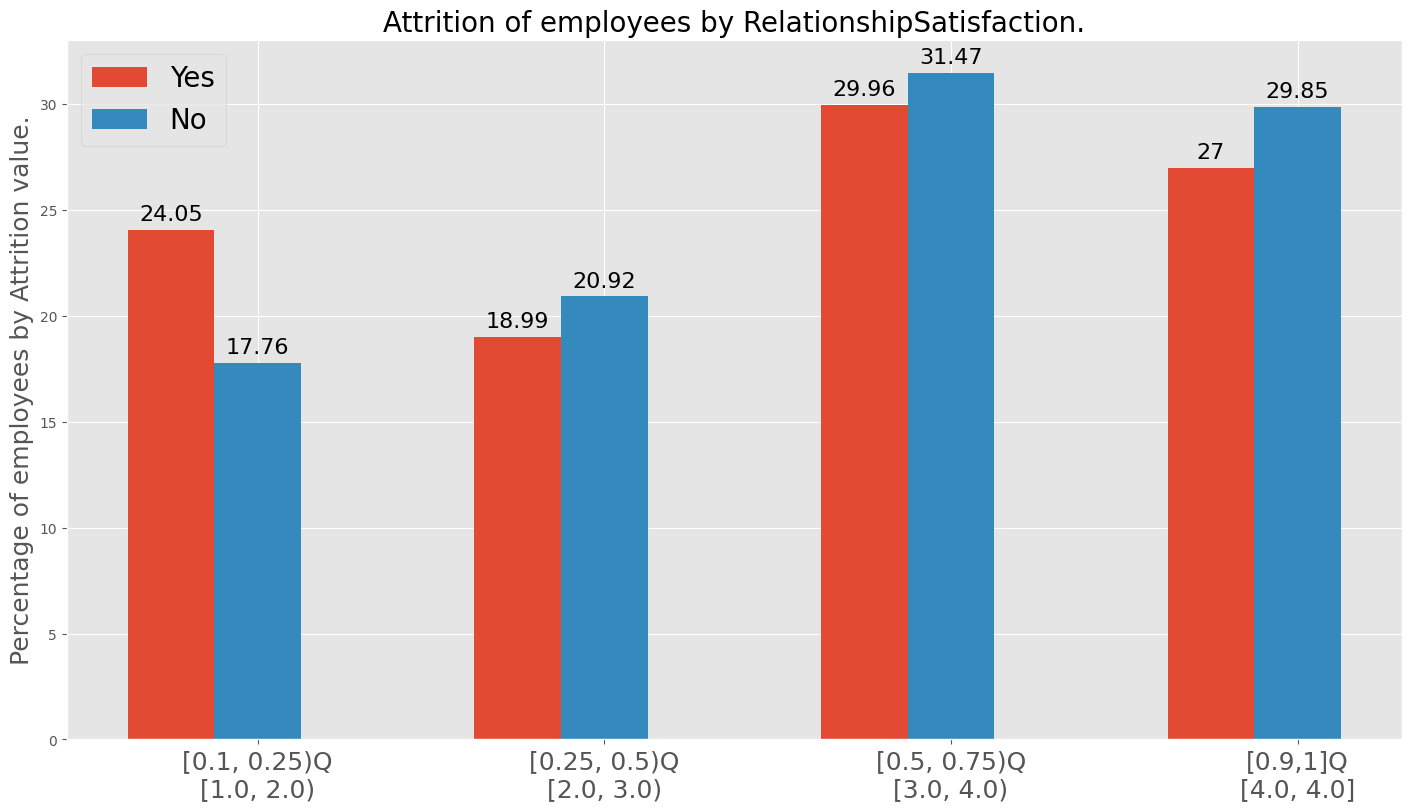

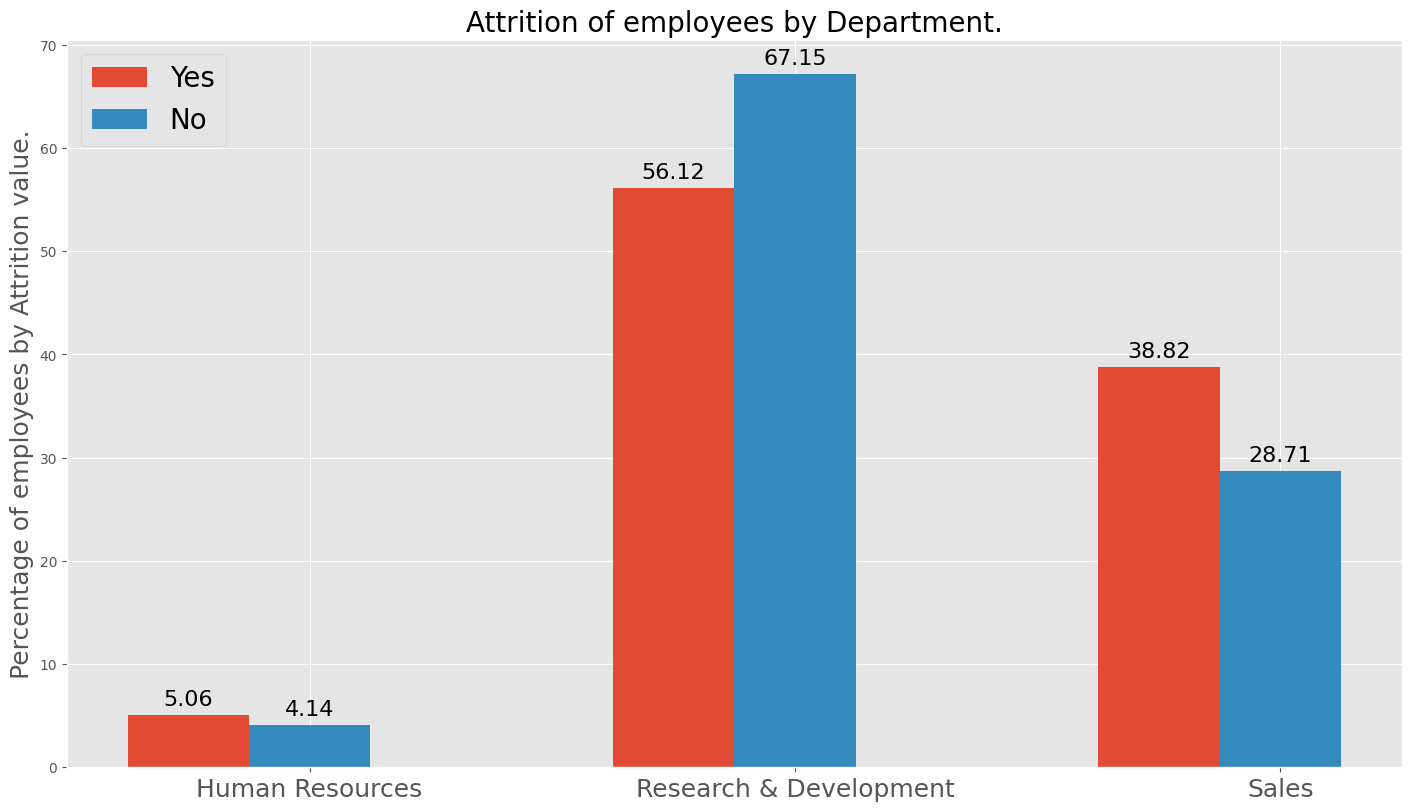

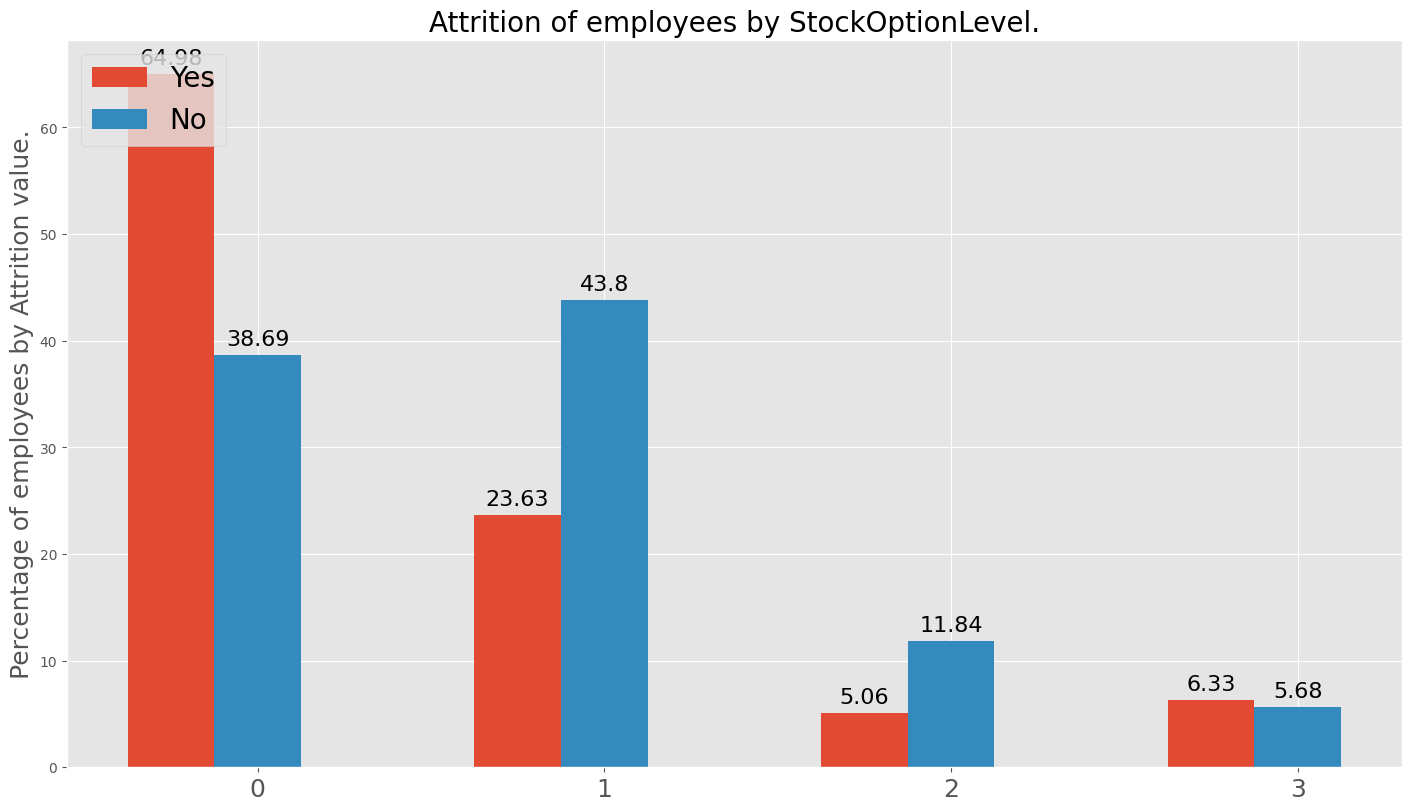

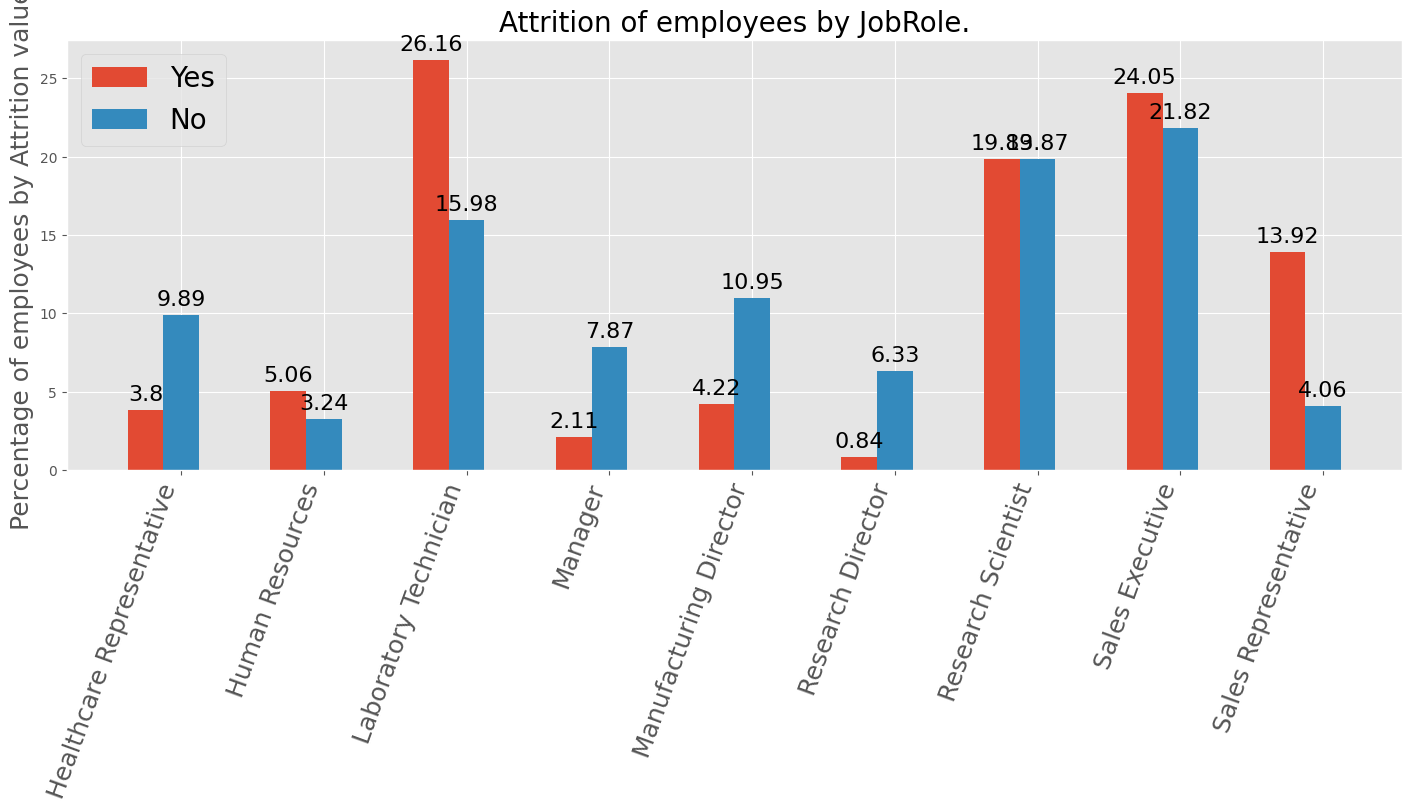

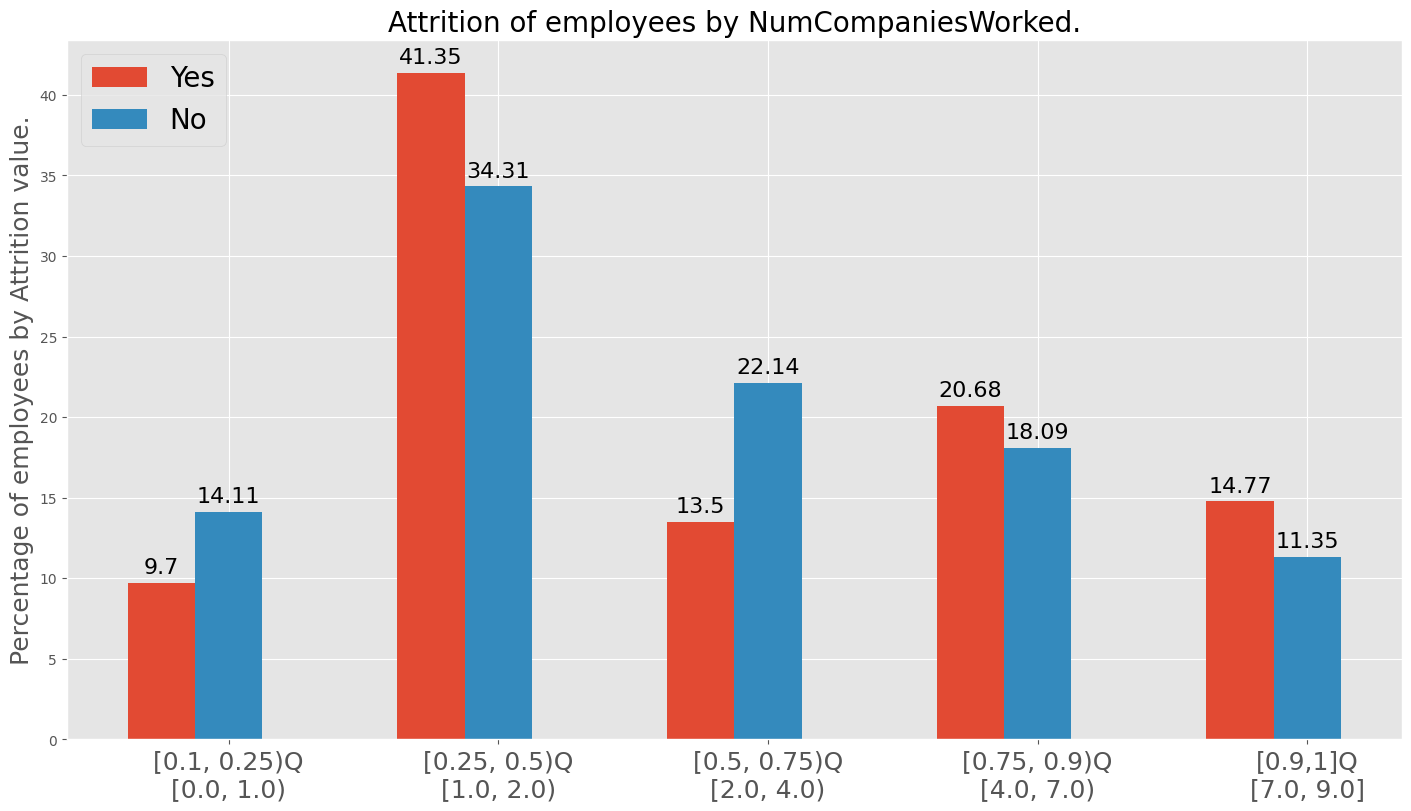

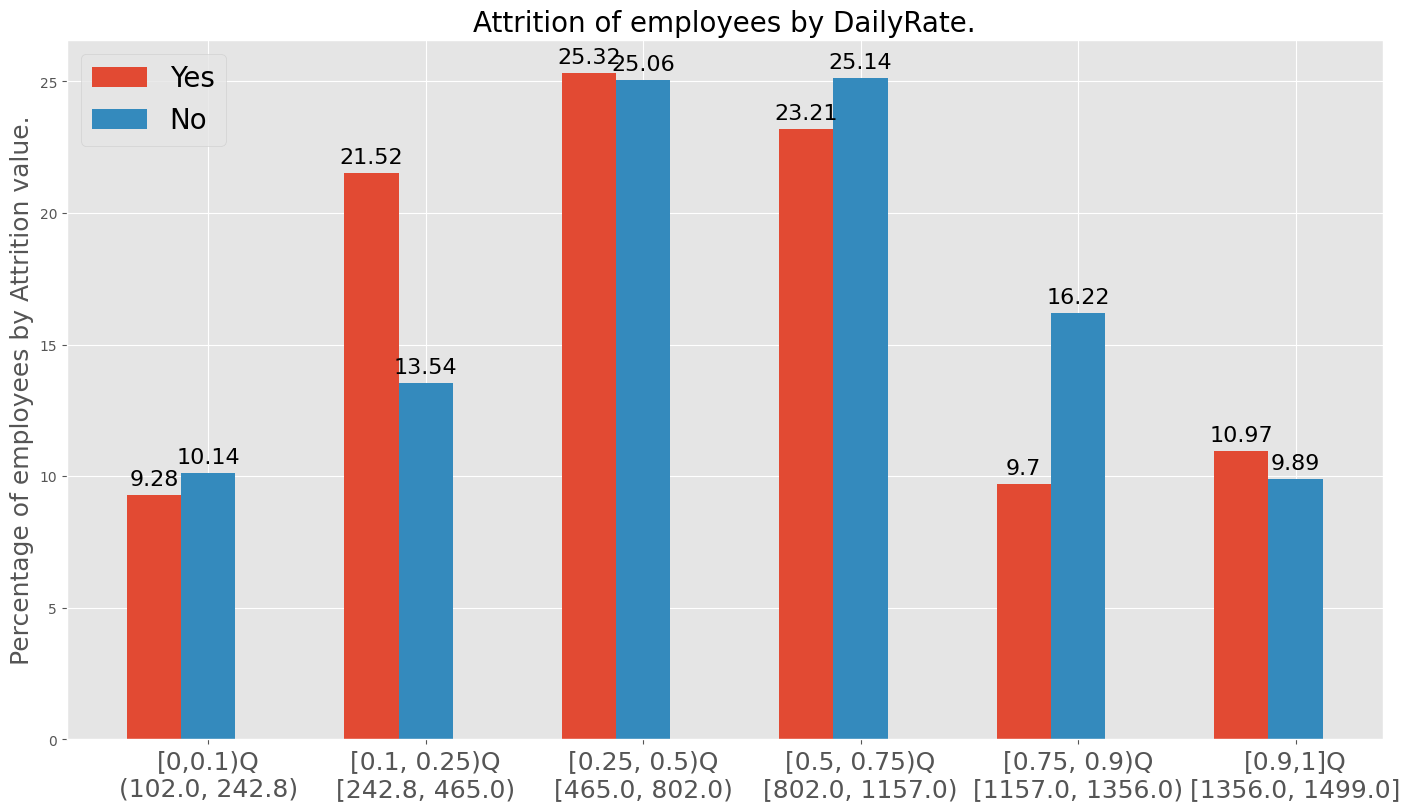

In [19]:
attrition_plotting = AttritionPlotting('Attrition', data_pd_df, base_fontsize=18)
attrition_plotting.plot_all_columns(True)
plt.show()

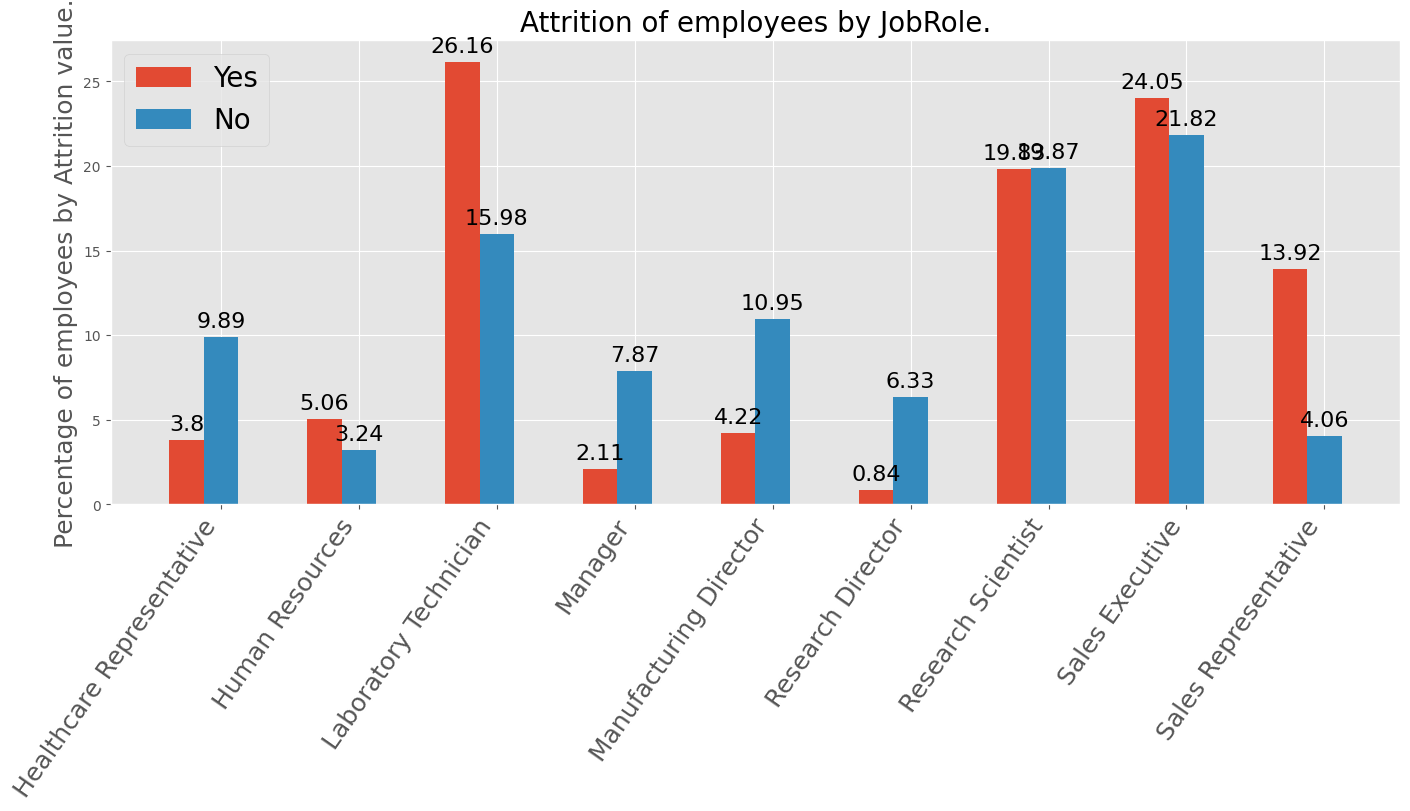

In [22]:
attrition_plotting.plot_column('JobRole', True)
plt.show()